#Problem Statement
##Context

The housing market is one of the most crucial components of any national economy. Hence, observations of the housing market and accurate predictions of real estate prices are helpful for real estate buyers and sellers as well as economic specialists. It is crucial for the establishment of real estate policies and can help real estate owners and agents make informative decision. However, real estate forecasting is a complicated and difficult task owing to many direct and indirect factors that inevitably influence the accuracy of predictions.

The aim of this project is to employ actual transaction data and machine learning models to predict prices of housing in Washington, D.C., which is the capital of the United States. The actual transaction data contain attributes and transaction prices of real estate that respectively serve as independent variables and dependent variables for machine learning models.

##Business Objective

The objective of this project is to predict the house of a price in order to help both buyers and sellers to find or determine the best housing price without underpricing or overpricing.

##Output

The output of this project is the predicted price of a house given its features such as: number of rooms, land area, etc.

##Machine Learning Task

This project will use supervised machine learning because in the dataset, the price of the house is already given. By using the price data, we can try to predict the unseen data by using the data that we already have.

##Performance Measure

In order to measure the performance of the regression model, we use the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score

https://github.com/elvanselvano/purwadhika-final-project/tree/main/notebooks

In [10]:
! pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from scipy import stats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  

# Styling
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'ggplot2'
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')
     

<ipython-input-11-5b5047e297b1>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


##Import & Splitting Data
Firstly, we split the dataset into two parts, dev set and test set. The dev set will be used for EDA, data preprocessing, and model training. While the test set is an unseen data we use for predicting.

Since the **PRICE** is related to the **SALEDATE**, we will use 90% of the earliest **SALEDATE** as the dev set and remaining 10% for the test to simulate the real world condition, where we have past data to train and predict the future.

In [12]:
raw_data_link = 'https://gurpreetsingh1111//raw_dataset.csv'
df = pd.read_csv(raw_data_link, index_col=0)
df.head(10)     

BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  \
0       4          0      Warm Cool  Y        2.0      8      4  1910.0   
1       3          1      Warm Cool  Y        2.0     11      5  1898.0   
2       3          1  Hot Water Rad  Y        2.0      9      5  1910.0   
3       3          1  Hot Water Rad  Y        2.0      8      5  1900.0   
4       2          1      Warm Cool  Y        1.0     11      3  1913.0   
5       3          2  Hot Water Rad  Y        1.0     10      5  1913.0   
6       1          0      Warm Cool  Y        2.0      5      2  1917.0   
7       3          1  Hot Water Rad  Y        2.0      8      4  1906.0   
8       3          1      Warm Cool  Y        2.0      7      3  1908.0   
9       1          1  Hot Water Rad  Y        1.0      6      2  1908.0   

   YR_RMDL   EYB  ...  LONGITUDE ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD  \
0   1988.0  1972  ... -77.040832      Old City 2    040 D Old City 2   
1   2007.0  1972  ... -77.040764      Old City 2    040 D Old City 2   
2   2009.0  1984  ... -77.040678      Old City 2    040 D Old City 2   
3   2003.0  1984  ... -77.040629      Old City 2    040 D Old City 2   
4   2012.0  1985  ... -77.039361      Old City 2    040 D Old City 2   
5      NaN  1972  ... -77.039715      Old City 2    040 D Old City 2   
6   1988.0  1957  ... -77.041055      Old City 2    040 D Old City 2   
7   2011.0  1972  ... -77.040129      Old City 2    040 D Old City 2   
8   2008.0  1967  ... -77.039903      Old City 2    040 D Old City 2   
9   1979.0  1950  ... -77.040081      Old City 2    040 D Old City 2   

  CENSUS_TRACT  CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT  
0       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
1       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
2       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
3       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
4       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
5       4201.0   004201 2006  Ward 2     152 -77.040429  38.914881       NW  
6       4201.0   004201 2005  Ward 2     152 -77.040429  38.914881       NW  
7       4201.0   004201 2005  Ward 2     152 -77.040429  38.914881       NW  
8       4201.0   004201 2005  Ward 2     152 -77.040429  38.914881       NW  
9       4201.0   004201 2005  Ward 2     152 -77.040429  38.914881       NW  

[10 rows x 48 columns]

We extract the year from the column **SALEDATE** to use only the data from 2016 to 2018. We use this timeframe to get the latest housing prices (2 years) because if we are using old data, it will not represent the real world cases.

In [13]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
df['SALEYEAR'] = df['SALEDATE'].dt.year
df['SALEYEAR']

0         2003.0
1         2000.0
2         2016.0
3         2006.0
4            NaN
           ...  
158952    2015.0
158953    2013.0
158954    2008.0
158955    2015.0
158956    2002.0
Name: SALEYEAR, Length: 158957, dtype: float64

In [14]:
df_2013_2018 = df[df['SALEYEAR'] >= 2016].reset_index()
df_2013_2018['SALEYEAR'].value_counts()
     

2017.0    12399
2016.0    10491
2018.0     6636
Name: SALEYEAR, dtype: int64

In [15]:
df_date_sorted = df_2013_2018.sort_values(by='SALEDATE')
(df_date_sorted['SALEDATE'].dropna().shape[0])*0.9     

26573.4

In [16]:
dev = df_date_sorted.iloc[:26573,:]
dev = dev.sort_index().reset_index(drop=True)
test = df_date_sorted.iloc[26573:,:]
test = test.sort_index().reset_index(drop=True)

In [16]:

from google.colab import files
dev.to_csv('dev_data.csv',index=False)
test.to_csv('test_data.csv',index=False)

files.download('dev_data.csv')
files.download('test_data.csv')

##Data Exploration
For data exploration, we will only use the dev dataset to avoid snooping bias.

In [17]:

df = dev.copy() # using only dev set for EDA
df.head()

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0      2       3          1  Hot Water Rad  Y        2.0      9      5   
1     18       3          1  Hot Water Rad  Y        2.0     10      4   
2     20       3          1  Hot Water Rad  Y        1.0     14      5   
3     31       3          0     Forced Air  Y        2.0      9      3   
4     34       3          1     Forced Air  Y        2.0     10      3   

      AYB  YR_RMDL  ...  ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD CENSUS_TRACT  \
0  1910.0   2009.0  ...       Old City 2    040 D Old City 2       4201.0   
1  1908.0   2006.0  ...       Old City 2    040 D Old City 2       4201.0   
2  1880.0   2009.0  ...       Old City 2    040 E Old City 2       5201.0   
3  1900.0   2004.0  ...       Old City 2    040 E Old City 2       5201.0   
4  1900.0   2008.0  ...       Old City 2    040 E Old City 2       5201.0   

   CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT SALEYEAR  
0   004201 2006  Ward 2     152 -77.040429  38.914881       NW   2016.0  
1   004201 2005  Ward 2     152 -77.040429  38.914881       NW   2016.0  
2   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2016.0  
3   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2016.0  
4   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2018.0  

[5 rows x 50 columns]

In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26573 entries, 0 to 26572
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               26573 non-null  int64         
 1   BATHRM              26573 non-null  int64         
 2   HF_BATHRM           26573 non-null  int64         
 3   HEAT                26573 non-null  object        
 4   AC                  26573 non-null  object        
 5   NUM_UNITS           15588 non-null  float64       
 6   ROOMS               26573 non-null  int64         
 7   BEDRM               26573 non-null  int64         
 8   AYB                 26528 non-null  float64       
 9   YR_RMDL             15242 non-null  float64       
 10  EYB                 26573 non-null  int64         
 11  STORIES             15564 non-null  float64       
 12  SALEDATE            26573 non-null  datetime64[ns]
 13  PRICE               20639 non-null  float64   

##Encode Data Types
In order to visualize and analyze the data, we need to cast the data type according to the definition.

In [19]:
df['NUM_UNITS'] = df['NUM_UNITS'].astype(pd.Int64Dtype())
df['KITCHENS'] = df['KITCHENS'].astype(pd.Int64Dtype())
df['USECODE'] = df['USECODE'].astype(pd.Int64Dtype()).astype('category')
df['ZIPCODE'] = df['ZIPCODE'].astype(pd.Int64Dtype()).astype('category')
df['CMPLX_NUM'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
df['CENSUS_TRACT'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
     

##1. Price

##Qualified Price
The **QUALIFIED** feature is internally-used indicator to reflect if a sale is representative of market value according to the office's internal criteria. The label **Q** means Qualified while **U** means Unqualified. The author of the dataset suggest to drop the U records because it will affect the performance of the model.

First, we want to compare these value with ROOMS to see the distribution.

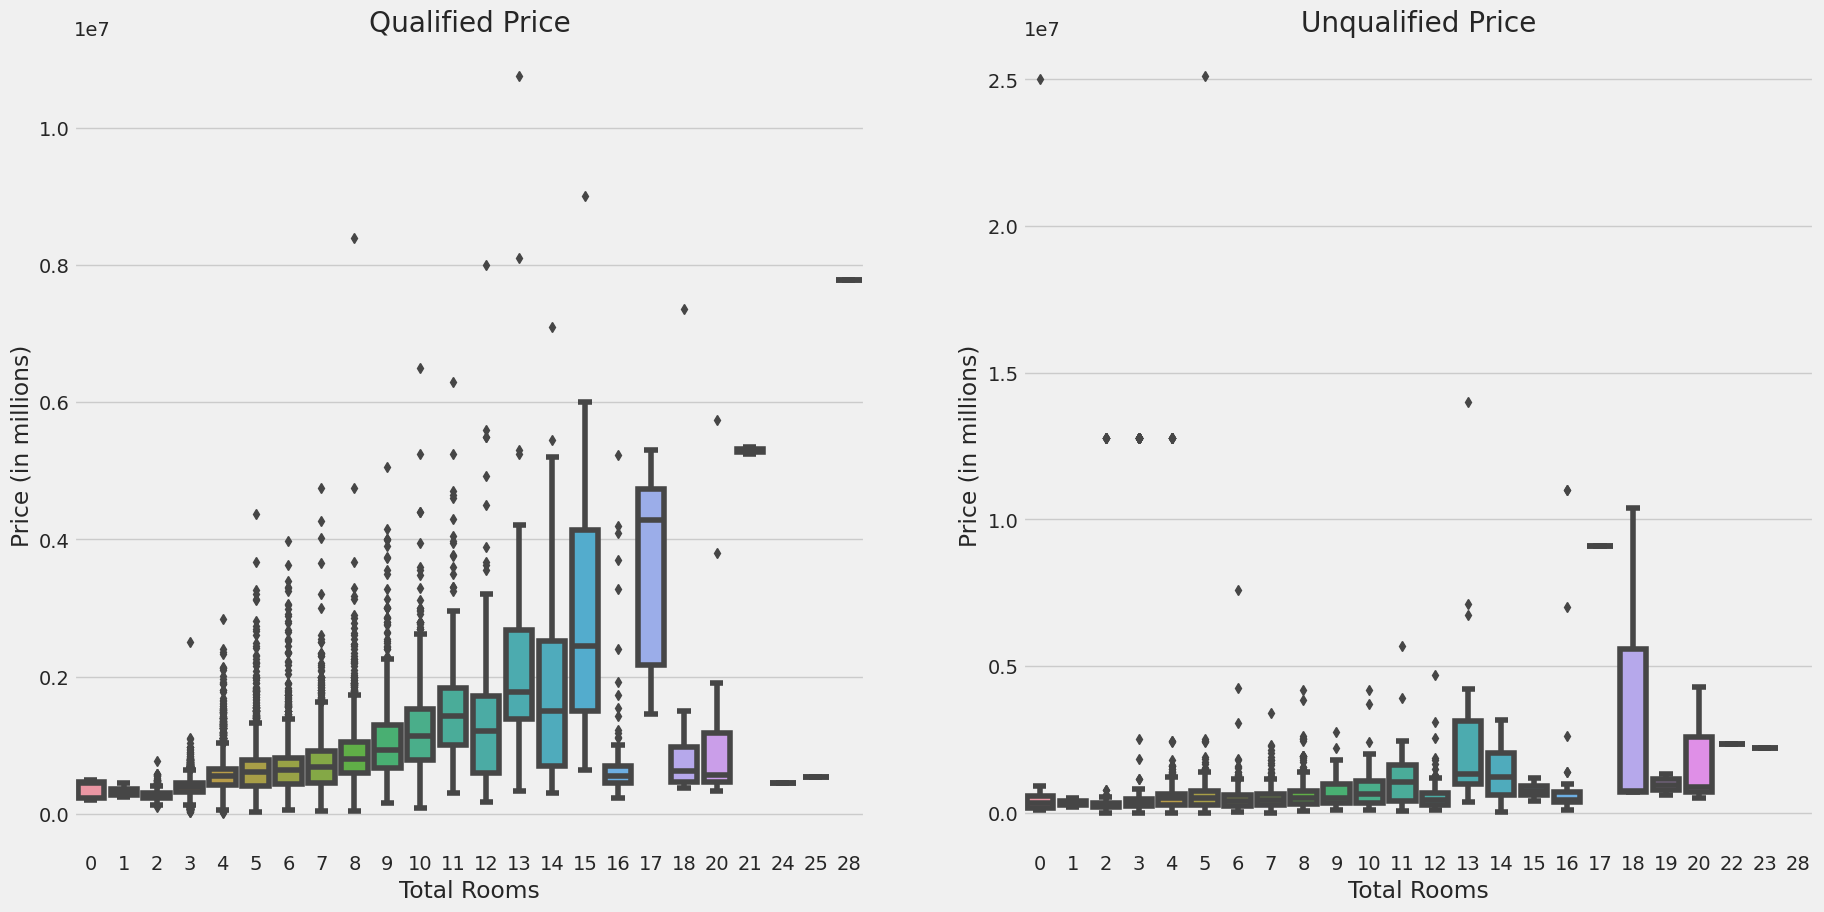

In [20]:
q = df[df['QUALIFIED']=='Q'] # qualified property
u = df[df['QUALIFIED']=='U'] # unqualified property
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.boxplot(x='ROOMS', y='PRICE', data=q, ax=ax[0]).set_title('Qualified Price')
sns.boxplot(x='ROOMS', y='PRICE', data=u, ax=ax[1]).set_title('Unqualified Price')
ax[0].set_ylabel('Price (in millions)')
ax[1].set_ylabel('Price (in millions)')
ax[0].set_xlabel('Total Rooms')
ax[1].set_xlabel('Total Rooms')
plt.show()

Based on the charts above, we can see that the unqualified property does not reflect the market value. Therefore, we will follow the author's suggestion to remove all of the unqualified property from our dataset. Then, we will remove the **QUALIFIED** feature because now it only contains a single value which is **Q**.

In [21]:
df_q = df[df['QUALIFIED']=='Q']
df_q = df_q.drop('QUALIFIED', axis=1)

print('Before removing unqualified property:', df.shape)
print('After removing unqualified property:', df_q.shape)

Before removing unqualified property: (26573, 50)
After removing unqualified property: (16072, 49)


##Price by Year

Now that we have qualified property, we will analyze the price by year. We can see that the price are increasing year by year although there are some years when the price of housing dropped.



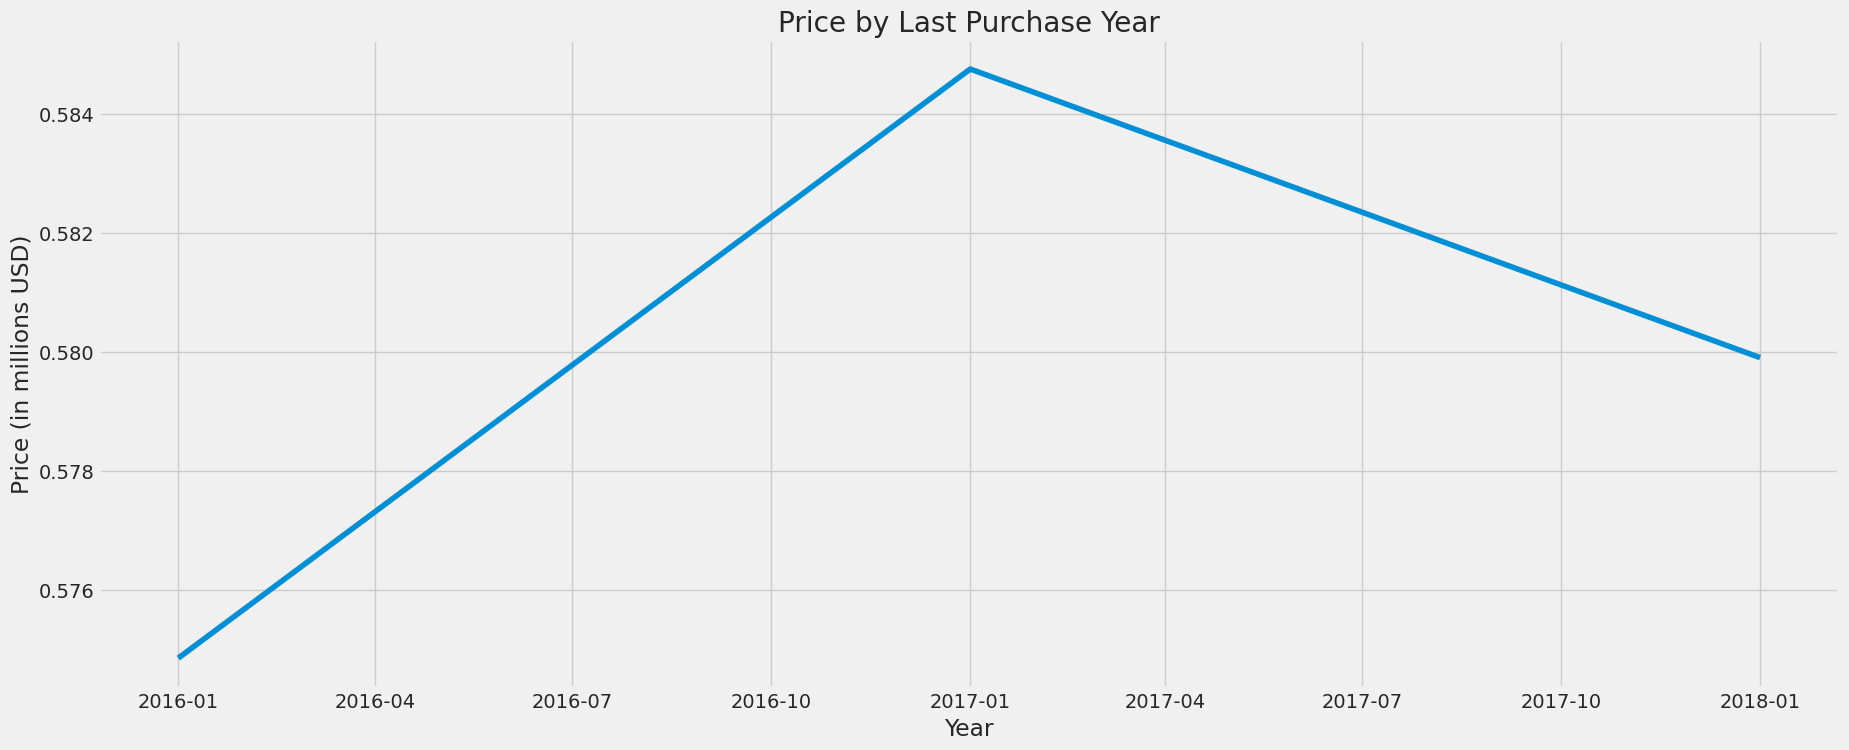

In [22]:
df_t = df_q.copy()
df_t['PRICE_MIL'] = df_q['PRICE']/1e6

df_t['SALEYEAR'] = pd.to_datetime(df_t['SALEYEAR'], format='%Y')
yearly_med_price = df_t.groupby('SALEYEAR').median('PRICE_MIL')
  
plt.figure(figsize=(20,8))
sns.lineplot(x='SALEYEAR',y='PRICE_MIL',data=yearly_med_price)
plt.title('Price by Last Purchase Year')
plt.xlabel('Year')
plt.ylabel('Price (in millions USD)')
plt.show()

Then, we will split the data based on the **WARD**. We can see that all of the prices are going up even though currently, the price of the property in **WARD 3** is currently downtrend.

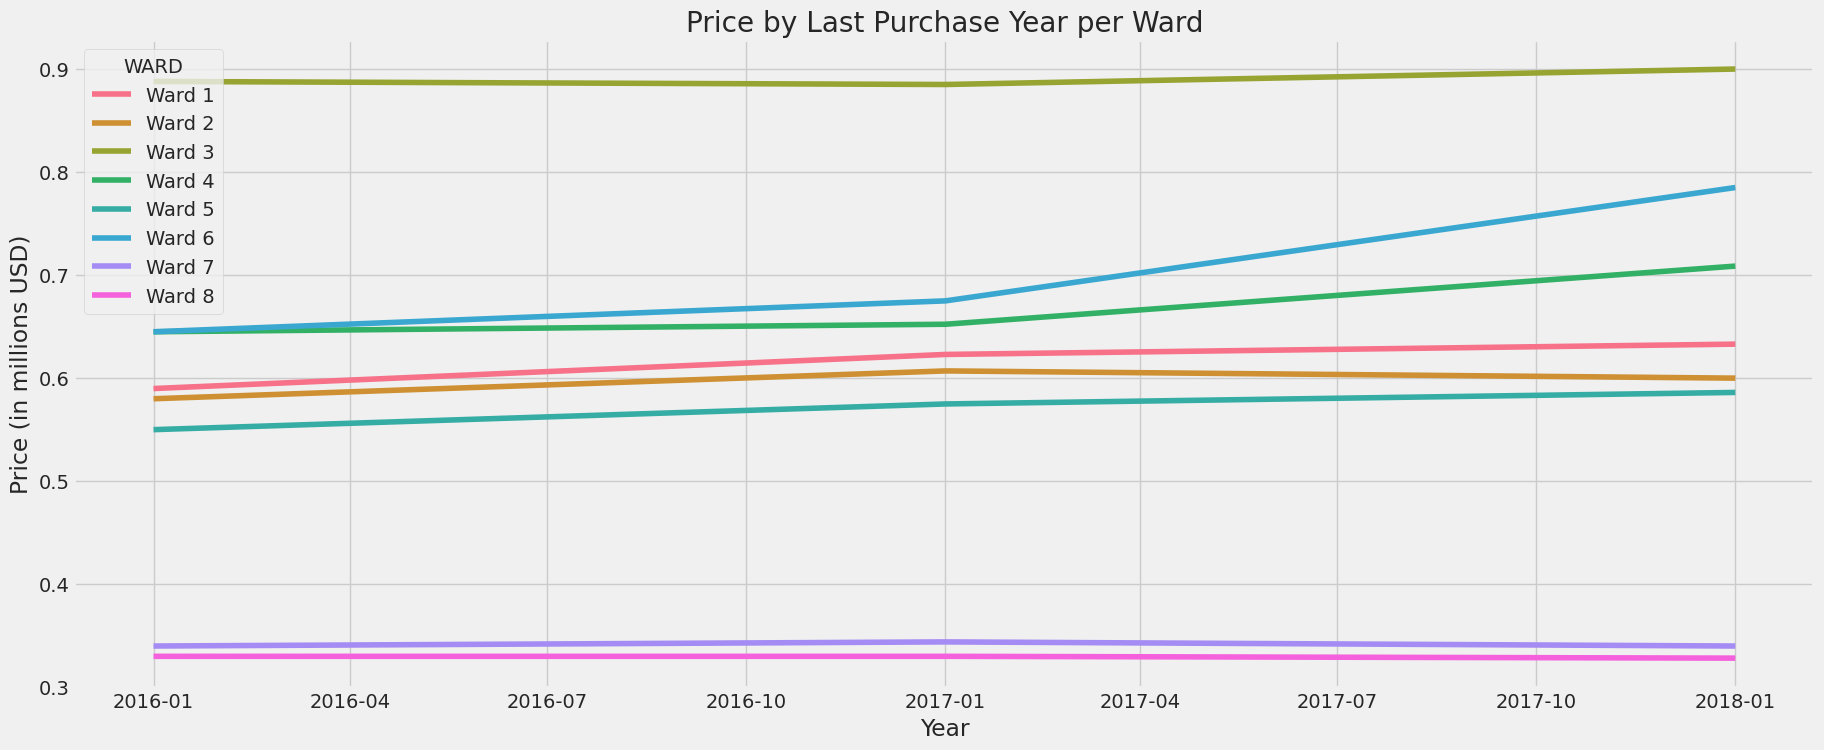

In [23]:
plt.figure(figsize=(20,8))
yearly_ward_price = df_t.groupby(['SALEYEAR','WARD']).median()
sns.lineplot(x='SALEYEAR',y='PRICE_MIL',data=yearly_ward_price , hue='WARD')
plt.title('Price by Last Purchase Year per Ward')
plt.xlabel('Year')
plt.ylabel('Price (in millions USD)')
plt.show()


Now, we will see the distribution of the column **PRICE**. We can see that this column is skewed because there are many houses with very expensive price and some houses with very cheap price.

In [24]:
fig = px.histogram(df_q, x='PRICE', labels = {'PRICE':'Price (USD)'},nbins=200
                   , title='Distribution of Properties Price in DC',
                   color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(showlegend=False, margin=dict(l=20,r=20,t=40,b=20))
fig.show()

For the purpose of data visualization, we will only use **90%** data **(5% - 95%)** in this EDA in order to gain better insights of the data. It will also help us in finding the patterns in the charts we will be creating.

In [25]:
p5 = df_q['PRICE'].quantile(0.05)
p95 = df_q['PRICE'].quantile(0.95)
print(p5, p95)

246000.0 1580000.0


In [26]:
df_viz_95 = df_q[(df_q['PRICE'] >= p5) & (df_q['PRICE'] <= p95)]
df_viz_95.describe()


index        BATHRM     HF_BATHRM  NUM_UNITS         ROOMS  \
count   14468.000000  14468.000000  14468.000000     8194.0  14468.000000   
mean    89004.288222      1.918786      0.452516   1.174762      5.764929   
std     47342.471510      0.884635      0.551889   0.561569      2.424380   
min        41.000000      0.000000      0.000000        0.0      0.000000   
25%     50280.250000      1.000000      0.000000        1.0      4.000000   
50%     92189.500000      2.000000      0.000000        1.0      6.000000   
75%    134176.000000      2.000000      1.000000        1.0      7.000000   
max    158944.000000      8.000000      7.000000        5.0     25.000000   

              BEDRM           AYB      YR_RMDL           EYB      STORIES  \
count  14468.000000  14454.000000  9082.000000  14468.000000  8183.000000   
mean       2.580384   1947.136986  2005.292447   1968.255391     2.081254   
std        1.302610     39.489721    13.531608     30.173615     0.444971   
min        0.000000   1765.000000  1927.000000   1870.000000     0.000000   
25%        2.000000   1917.000000  2003.000000   1954.000000     2.000000   
50%        3.000000   1937.000000  2010.000000   1967.000000     2.000000   
75%        3.000000   1979.000000  2016.000000   1986.000000     2.000000   
max       13.000000   2018.000000  2019.000000   2018.000000    20.000000   

       ...    FIREPLACES      LANDAREA    CMPLX_NUM   LIVING_GBA  \
count  ...  14468.000000  14468.000000       6274.0  6274.000000   
mean   ...      0.502212   1789.436550  3030.826905   897.570609   
std    ...     11.426320   1993.582056  1501.932126   362.030597   
min    ...      0.000000      0.000000       1001.0   232.000000   
25%    ...      0.000000    400.000000       1855.0   636.000000   
50%    ...      0.000000   1208.500000       2740.0   803.000000   
75%    ...      1.000000   2316.000000       4290.0  1082.000000   
max    ...   1017.000000  39831.000000       5621.0  3008.000000   

           LATITUDE     LONGITUDE  CENSUS_TRACT             X             Y  \
count  14468.000000  14468.000000        6274.0  14453.000000  14453.000000   
mean      38.915108    -77.016226   3030.826905    -77.016268     38.915112   
std        0.028219      0.036531   1501.932126      0.036522      0.028209   
min       38.820060    -77.112527        1001.0    -77.111777     38.820576   
25%       38.897942    -77.038212        1855.0    -77.038255     38.898054   
50%       38.914670    -77.019681        2740.0    -77.019732     38.914881   
75%       38.933258    -76.989647        4290.0    -76.989568     38.933288   
max       38.993201    -76.909758        5621.0    -76.910511     38.993646   

           SALEYEAR  
count  14468.000000  
mean    2016.713644  
std        0.670639  
min     2016.000000  
25%     2016.000000  
50%     2017.000000  
75%     2017.000000  
max     2018.000000  

[8 rows x 25 columns]

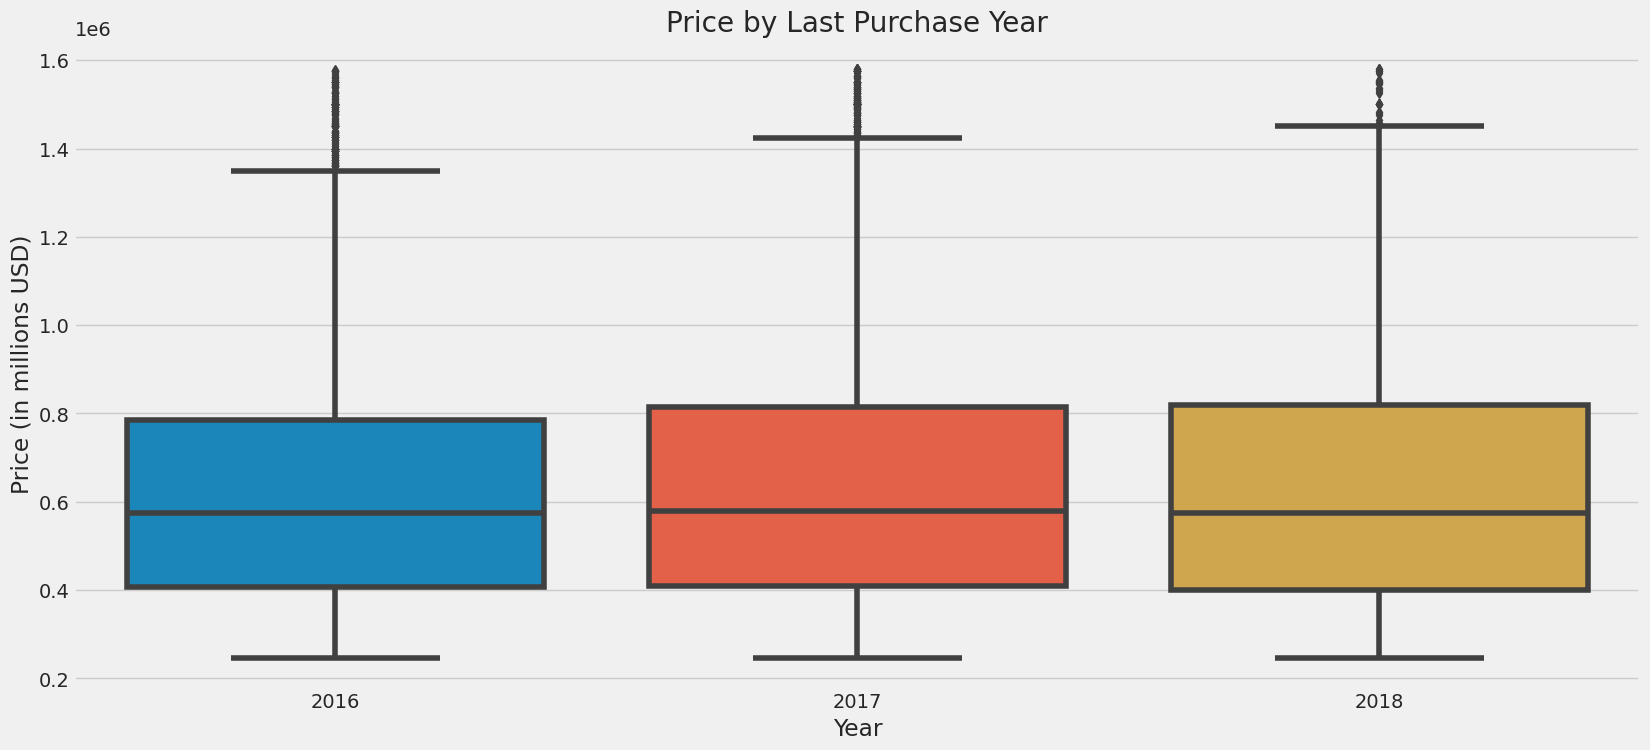

In [27]:
fig = px.histogram(df_viz_95, x='PRICE', labels = {'PRICE':'Price (USD)'}, nbins=40
                   ,marginal='box',title='Distribution of Properties Price in DC (90% data)',
                   color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(showlegend=False, margin=dict(l=20,r=20,t=40,b=20))
fig.show()
     
plt.figure(figsize=(18, 8))
sns.boxplot(x=df_viz_95['SALEYEAR'].dropna().astype(int), y=df_viz_95['PRICE'])
plt.title('Price by Last Purchase Year')
plt.xlabel('Year')
plt.ylabel('Price (in millions USD)')
plt.show()

The first chart shows the distribution of the price appears to be right-skewed. The range of the most expensive properties to the median, seems to be far higher than the gap to the lowest. This can reflect to the inequality of DC citizen. We also want to analyze the price distribution between property type and location

##Residential vs Condominium
Despite the difference is very subtle, the residential price is more expensive than the condominium in DC.

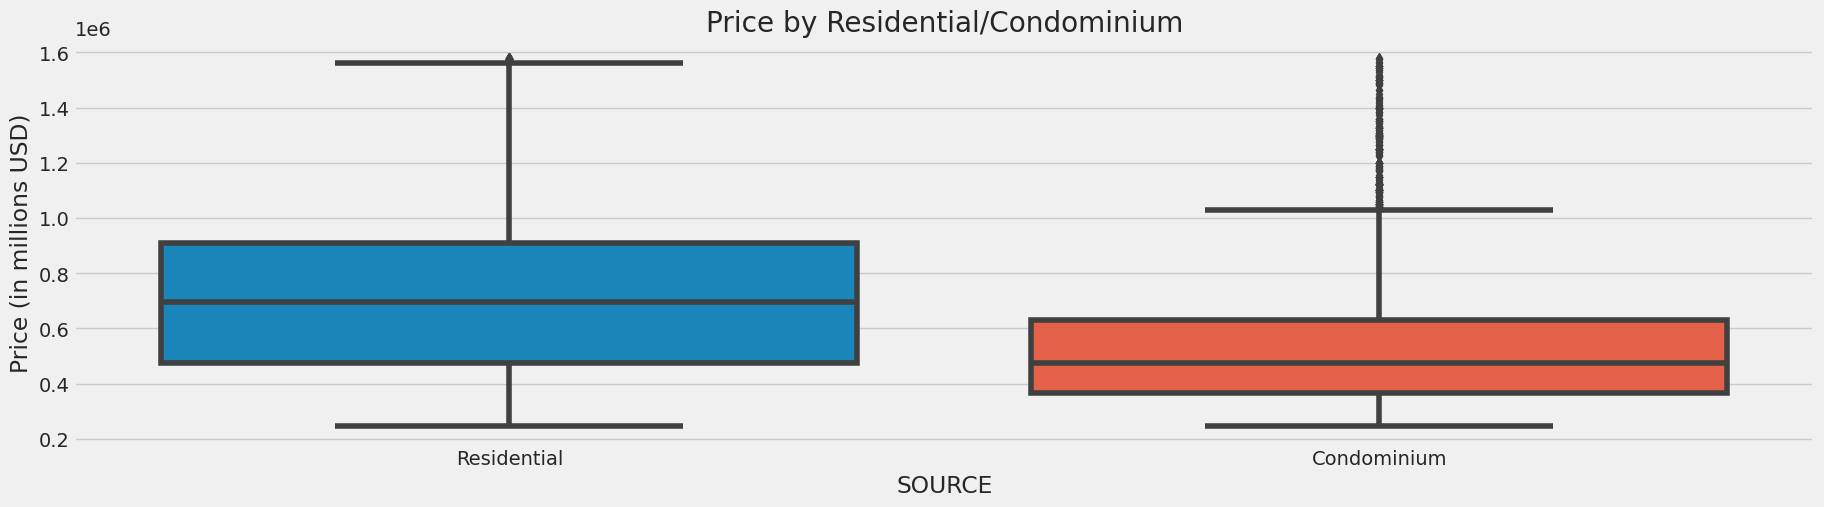

In [28]:

plt.figure(figsize=(20,5))
sns.boxplot(x='SOURCE', y='PRICE', data=df_viz_95).set_title('Price by Residential/Condominium')
plt.ylabel('Price (in millions USD)')
plt.show()

## Location Distribution by Region

In [29]:
quadrant = df_viz_95[~df_viz_95['QUADRANT'].isna()]
fig = px.scatter_mapbox(quadrant, lat='LATITUDE', lon='LONGITUDE', color='QUADRANT', hover_data=['QUADRANT', 'PRICE'],
                        color_discrete_sequence=px.colors.qualitative.Vivid, zoom=10, height=400, width=800, opacity=1,
                        title='Distribution of Properties by Quadrant')
fig.update_traces(marker=dict(size=5))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))

fig.show()
     


In [30]:

fig = px.scatter_mapbox(df_viz_95.sort_values(by='WARD'), lat='LATITUDE', lon='LONGITUDE', color='WARD', hover_data=['WARD', 'PRICE'],
                        color_discrete_sequence=px.colors.qualitative.Vivid, zoom=10, height=400, width=800, opacity=1,
                        title='Distribution of Properties by Wards')
fig.update_traces(marker=dict(size=5))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))

fig.show()
    

In [31]:
fig = px.scatter_mapbox(df_viz_95.sort_values(by='ZIPCODE'), lat='LATITUDE', lon='LONGITUDE', color='ZIPCODE', hover_data=['PRICE'],
                        color_discrete_sequence=px.colors.qualitative.Alphabet, zoom=10, height=400, width=800, opacity=1,
                        title='Distribution of Properties by Zipcode')
fig.update_traces(marker=dict(size=5))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))

fig.show()
     


In [32]:
fig = px.scatter_mapbox(df_viz_95, lat='LATITUDE', lon='LONGITUDE', color='ASSESSMENT_NBHD', hover_data=['WARD', 'PRICE'],
                        color_discrete_sequence=px.colors.qualitative.Alphabet, zoom=10, height=400, width=1000, opacity=1,
                        title='Distribution of Properties by Neighborhood')
fig.update_traces(marker=dict(size=5))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))
fig.show()

##House Style in Each Region

In [33]:
style = df_viz_95[~df_viz_95['STYLE'].isna()].copy() #remove missing data style
fig = px.scatter_mapbox(style.sort_values(by='STYLE'), lat='LATITUDE', lon='LONGITUDE', color='STYLE', hover_data=['STYLE', 'WARD'],
                        color_discrete_sequence=px.colors.qualitative.Prism, zoom=10, height=400, width=800, opacity=1,
                        title='House Style Mapping')
fig.update_traces(marker=dict(size=3))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))
fig.show()

Most of the residential in DC is dominated by 2 Story House. Besides,in the Ward 3 and 4 the number of 2.5 story is quite high, while in the Ward 1 and 6, three story residential is also common.

##Regional Price Distribution

In [34]:
df_viz_95.PRICE.describe()
     

count    1.446800e+04
mean     6.415727e+05
std      2.968552e+05
min      2.460000e+05
25%      4.075000e+05
50%      5.775000e+05
75%      8.000000e+05
max      1.580000e+06
Name: PRICE, dtype: float64

In [35]:
# grouping price
price_cat_df = df_viz_95.copy()
price_cat_df = price_cat_df.sort_values(by='PRICE')
label = ['<300k','300-500k','500-700k','700k-900k','900k-1.1M','1.1-1.3M','>1.3M']
price_cat_df['PRICE_CAT'] = pd.cut(df_viz_95['PRICE'],bins=(np.arange(0,22,3)*100000).tolist(),labels=label)    

In [36]:
fig = px.scatter_mapbox(price_cat_df, lat='LATITUDE', lon='LONGITUDE', color='PRICE_CAT', hover_data=['PRICE', 'WARD'],
                        color_discrete_sequence=px.colors.qualitative.Vivid, zoom=10, height=400, width=800, opacity=0.5,
                        title='Price Mapping')
fig.update_traces(marker=dict(size=3.5))
fig.update_layout(mapbox_style='stamen-terrain',margin=dict(l=10,r=0,t=40,b=10))
fig.show()

KeyError: ignored

In [37]:

# define function of boxplot vs price_trans
def boxplot_cat_price(df,features,rows,cols,fig_size,title,pad=10,rotation=0,ord=True):
  df_no_na = df[features].copy().dropna()

  fig, ax = plt.subplots(rows,cols,figsize=fig_size)
  for i in range(len(features)-1):
    if ord==True:
      table = df_no_na.groupby([features[i]],as_index=False)['PRICE'].median().sort_values(by='PRICE',ascending=False)
      sns.boxplot(x=features[i],y='PRICE',data=df_no_na,ax=ax[i],order=table[features[i]].to_list()).set_title('Price by '+ features[i],fontsize=17)
    elif ord==False :
      sns.boxplot(x=features[i],y='PRICE',data=df_no_na,ax=ax[i]).set_title('Price by '+ features[i],fontsize=17)
  for i in fig.axes:
    plt.sca(i)
    plt.xticks(rotation=rotation)
    plt.ylabel('Price (in millions USD)')
  fig.suptitle(title, fontsize=25, fontweight='bold')
  fig.tight_layout(pad=pad)
  plt.show()

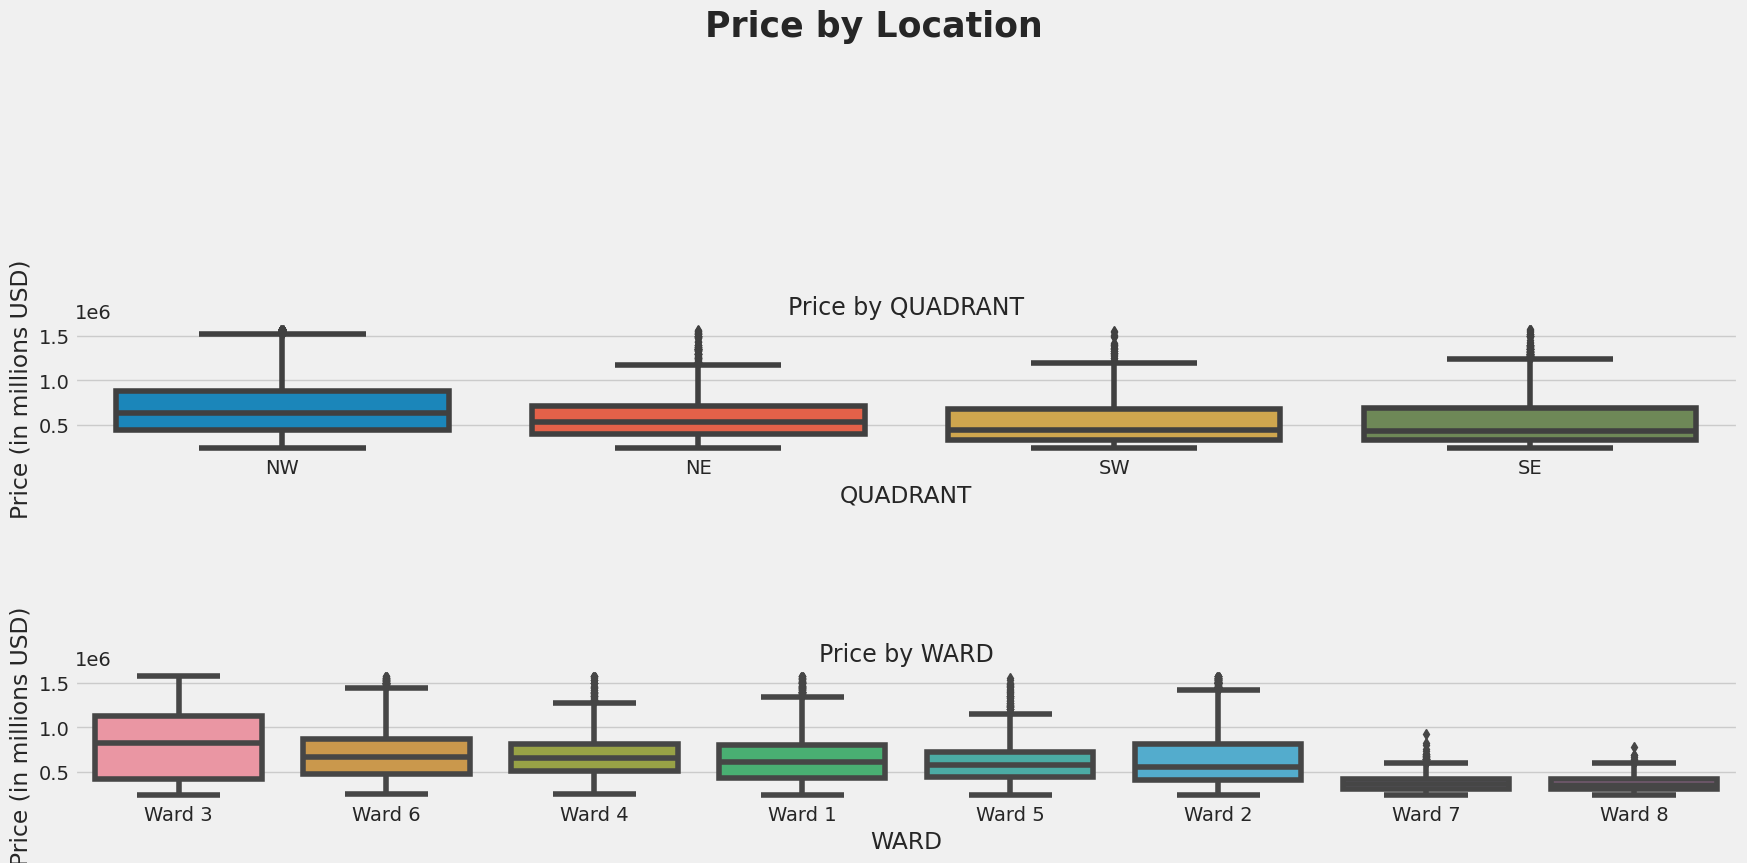

In [38]:
boxplot_cat_price(df=df_viz_95,features=['QUADRANT','WARD','PRICE'],rows=2,cols=1,fig_size=(20,10),title='Price by Location',pad=7)

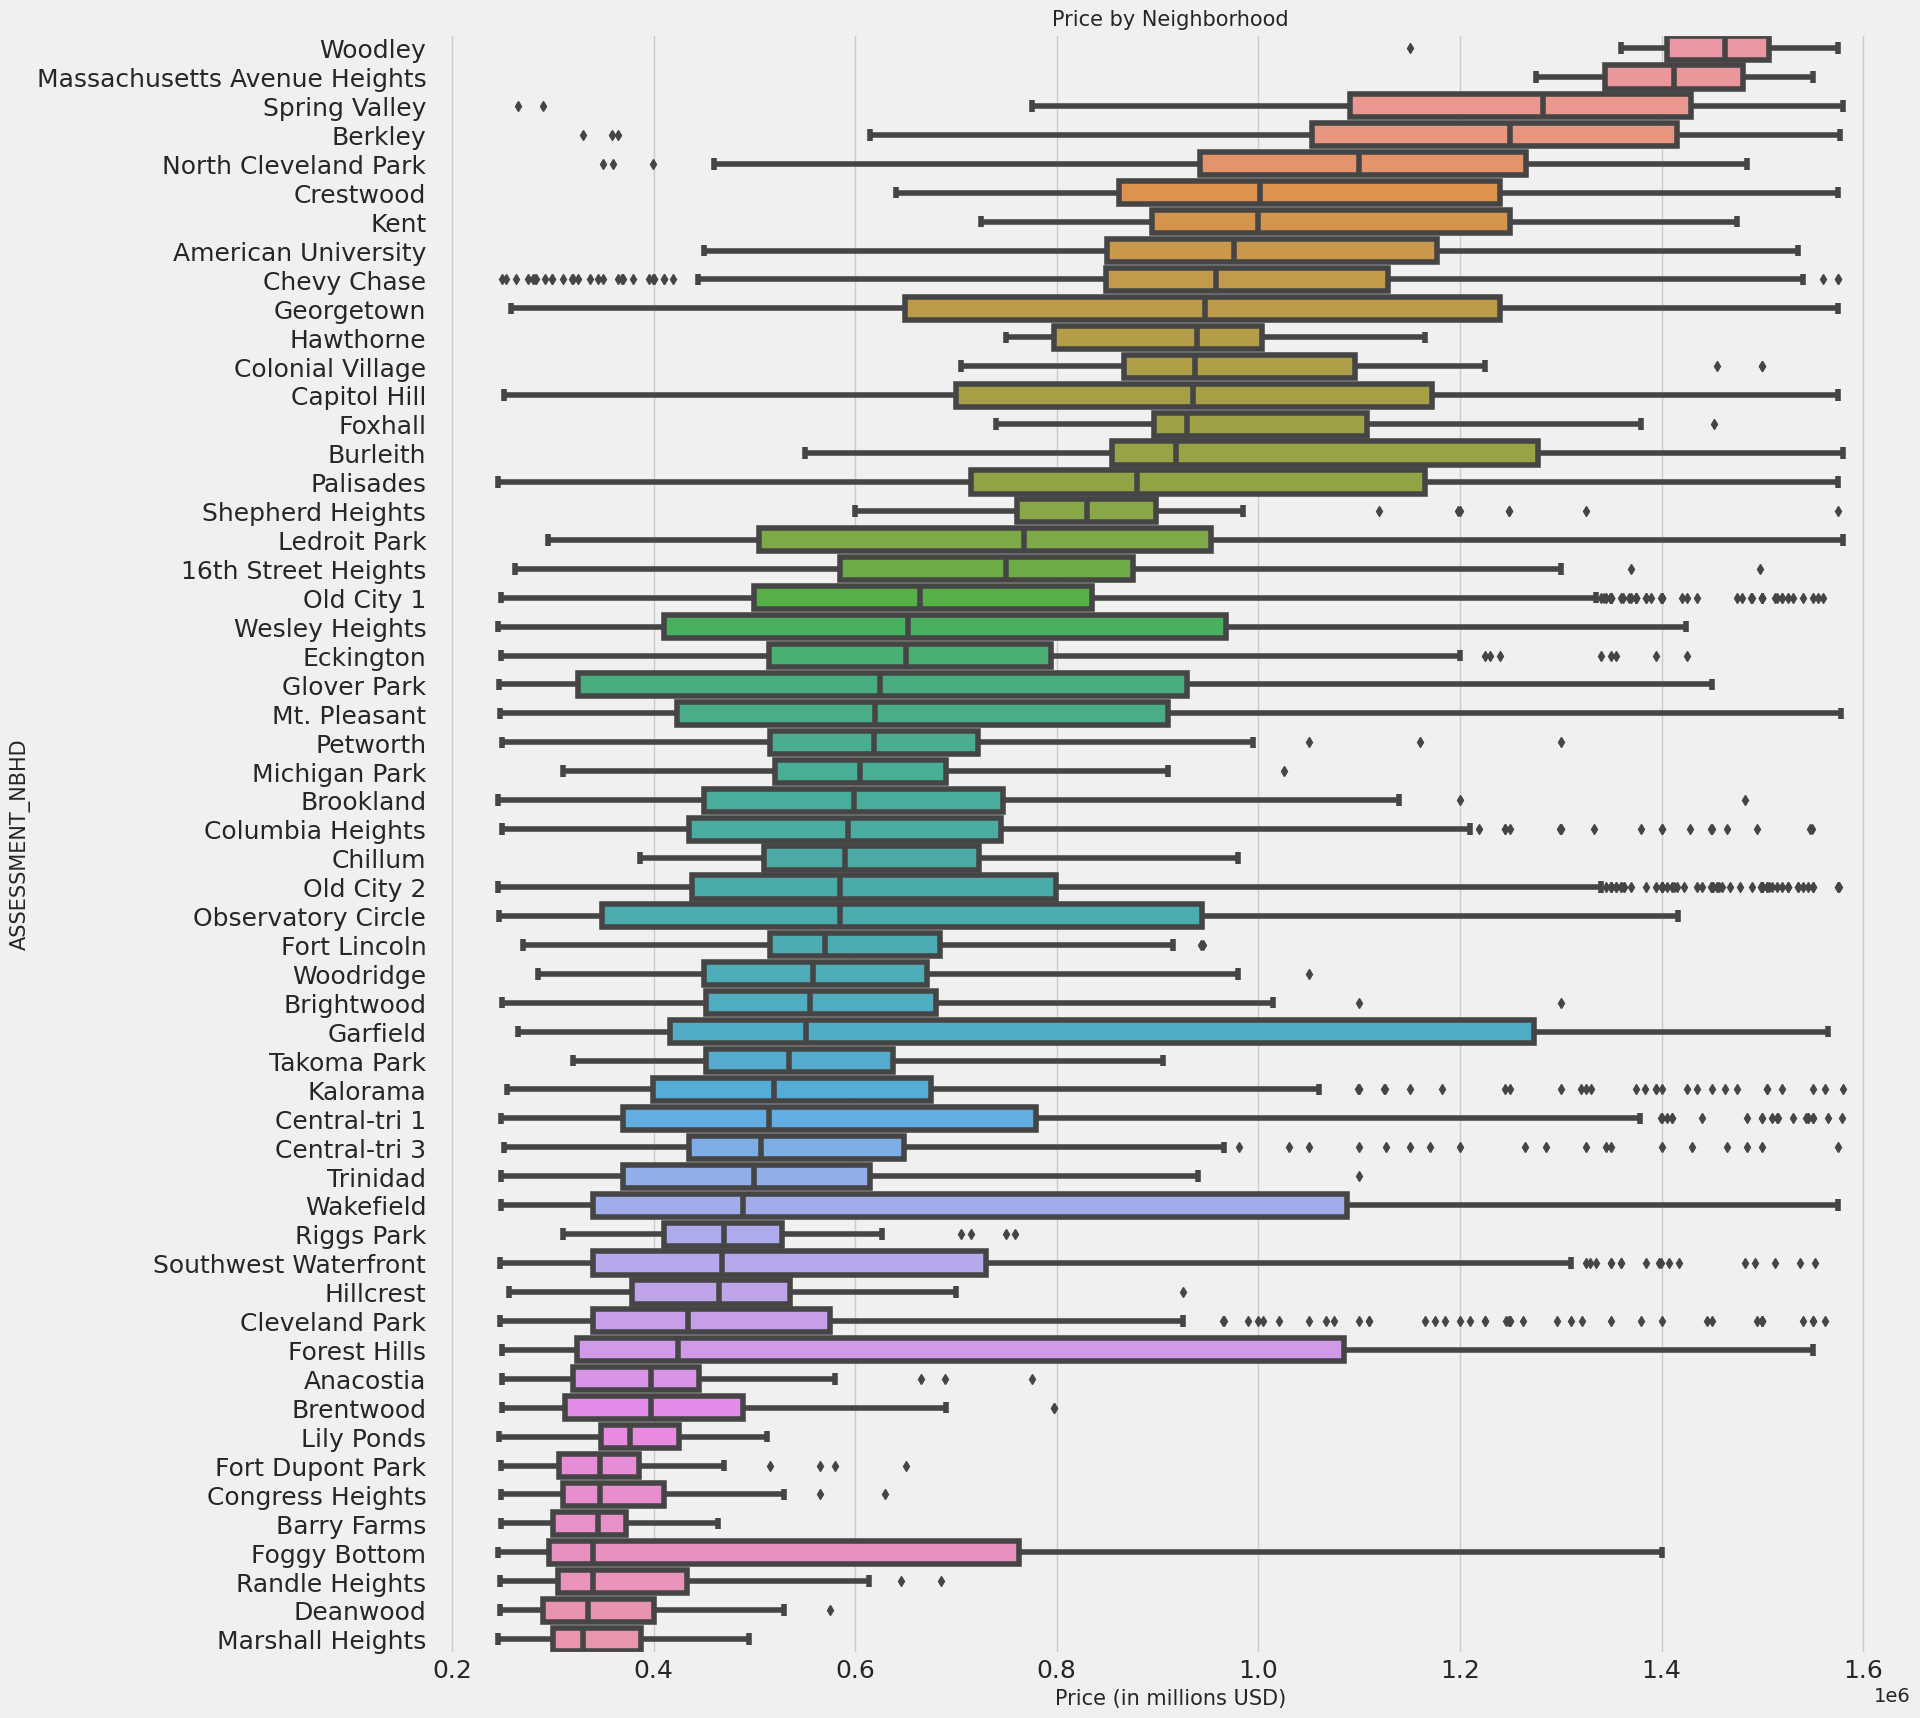

In [40]:

fig=plt.figure(figsize=(17,20))

table = df_viz_95.groupby(['ASSESSMENT_NBHD'],as_index=False)['PRICE'].median().sort_values(by='PRICE',ascending=False)

sns.boxplot(data=df_viz_95,x='PRICE',y='ASSESSMENT_NBHD',order=table['ASSESSMENT_NBHD'].to_list());
plt.yticks(fontsize=18);
plt.xticks(fontsize=18);
plt.title('Price by Neighborhood',fontsize=15)
plt.ylabel("ASSESSMENT_NBHD",fontsize=15);
plt.xlabel('Price (in millions USD)',fontsize=15);

In [41]:
# since the distribution is not normal, we will use the non-parametric test instead
# define function kruskal-wallis test vs price for all categorical value in each feature
def kruskal_price(feature,df):
  group_df = df[[feature, 'PRICE']].dropna().groupby([feature])
  group_list =[]
  val = df[feature].dropna().unique()
  for i in val:
    group_list.append(group_df.get_group(i)['PRICE'])
  
  h_stat, p_val = stats.kruskal(*group_list)
  print('Kruskal-Wallis Test results of {}\nH Stat = {}\nP = {}'.format(feature,h_stat, p_val))
     

for i in ['QUADRANT','WARD','ASSESSMENT_NBHD']:
  kruskal_price(i,df_q)
  print()

Kruskal-Wallis Test results of QUADRANT
H Stat = 1179.7331863094346
P = 1.8297558992606334e-255

Kruskal-Wallis Test results of WARD
H Stat = 3110.5870301288896
P = 0.0

Kruskal-Wallis Test results of ASSESSMENT_NBHD
H Stat = 5251.959720385471
P = 0.0



Since all the P-Value is below the alpha 0.05, we reject H0 which means the the population distribution for each features vs price are different. This shows all three features (**Quadrant**,**Ward**, and **Assessment_NBHD**) can distinguish price value.

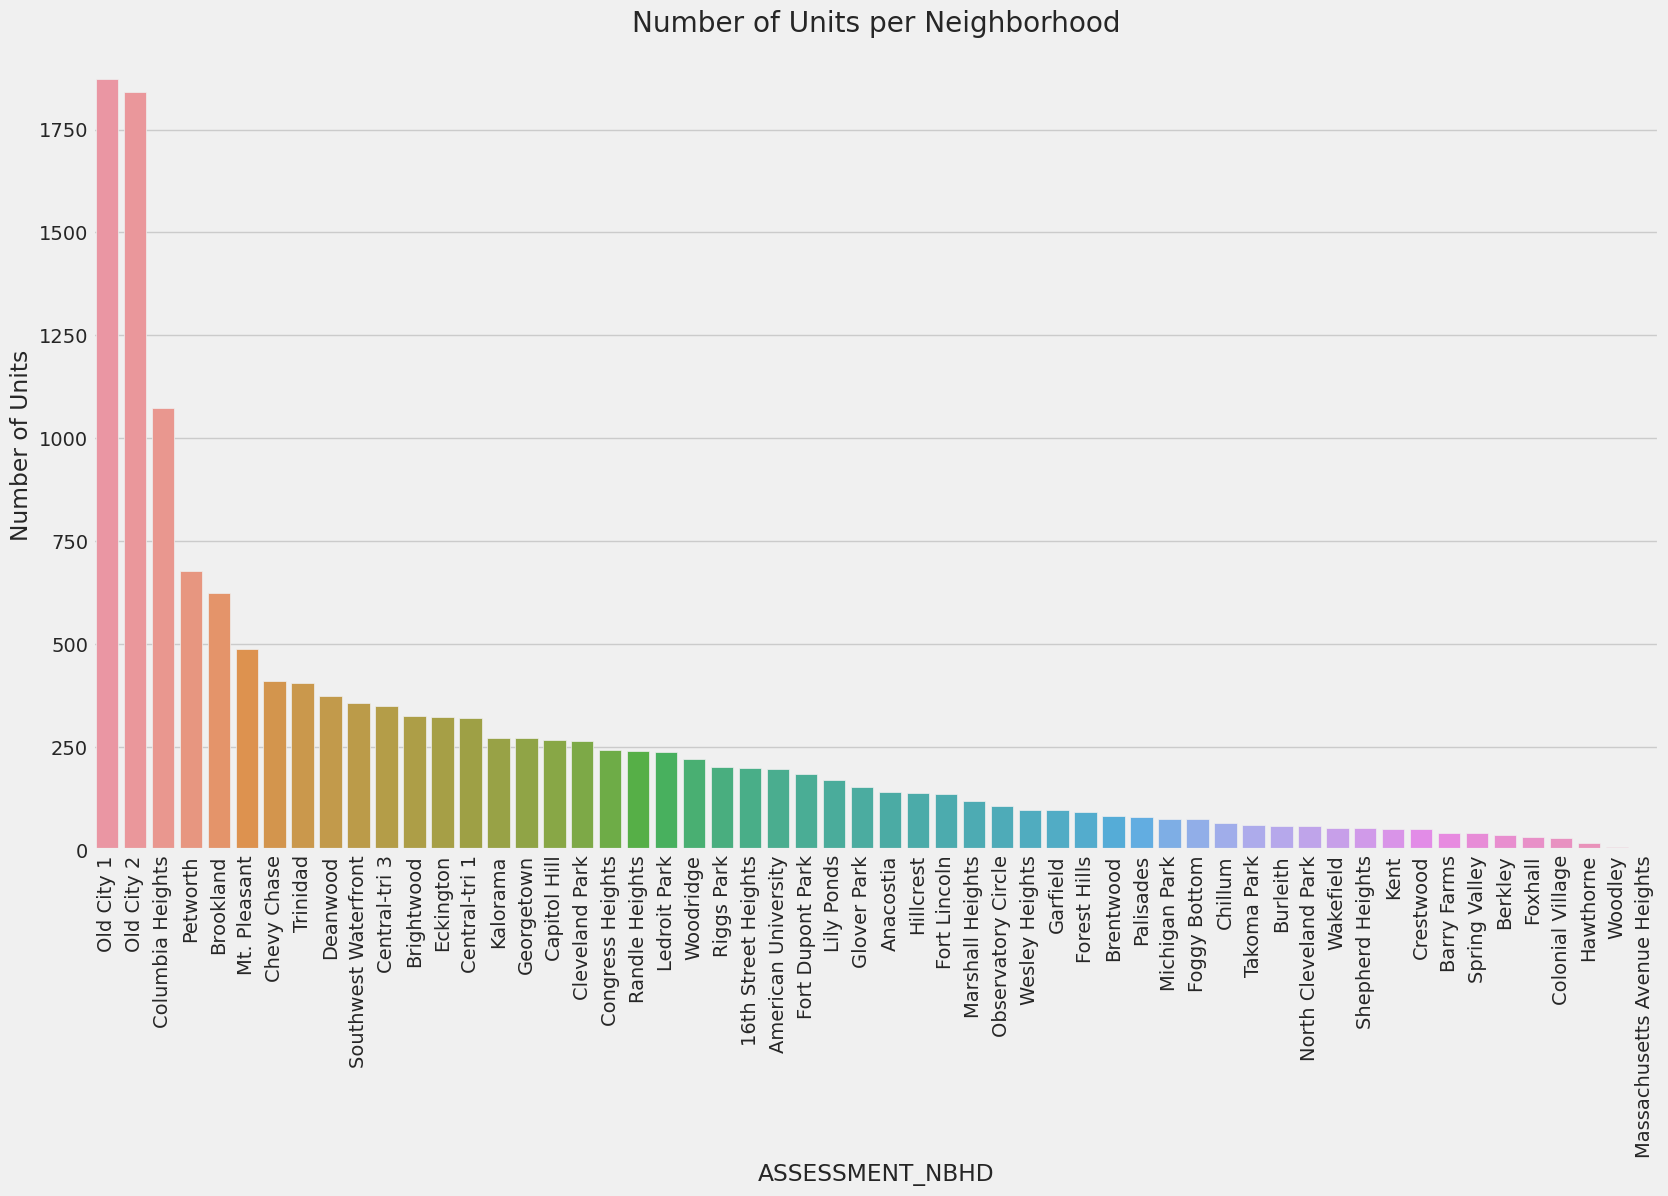

In [42]:

plt.figure(figsize=(18,10))
ca_count=sns.countplot(x=df_viz_95['ASSESSMENT_NBHD'], order = df_viz_95['ASSESSMENT_NBHD'].value_counts().index)
ca_count.set_xticklabels(ca_count.get_xticklabels(),rotation=90)
plt.title('Number of Units per Neighborhood')
plt.ylabel('Number of Units')
plt.show()
     

##Area

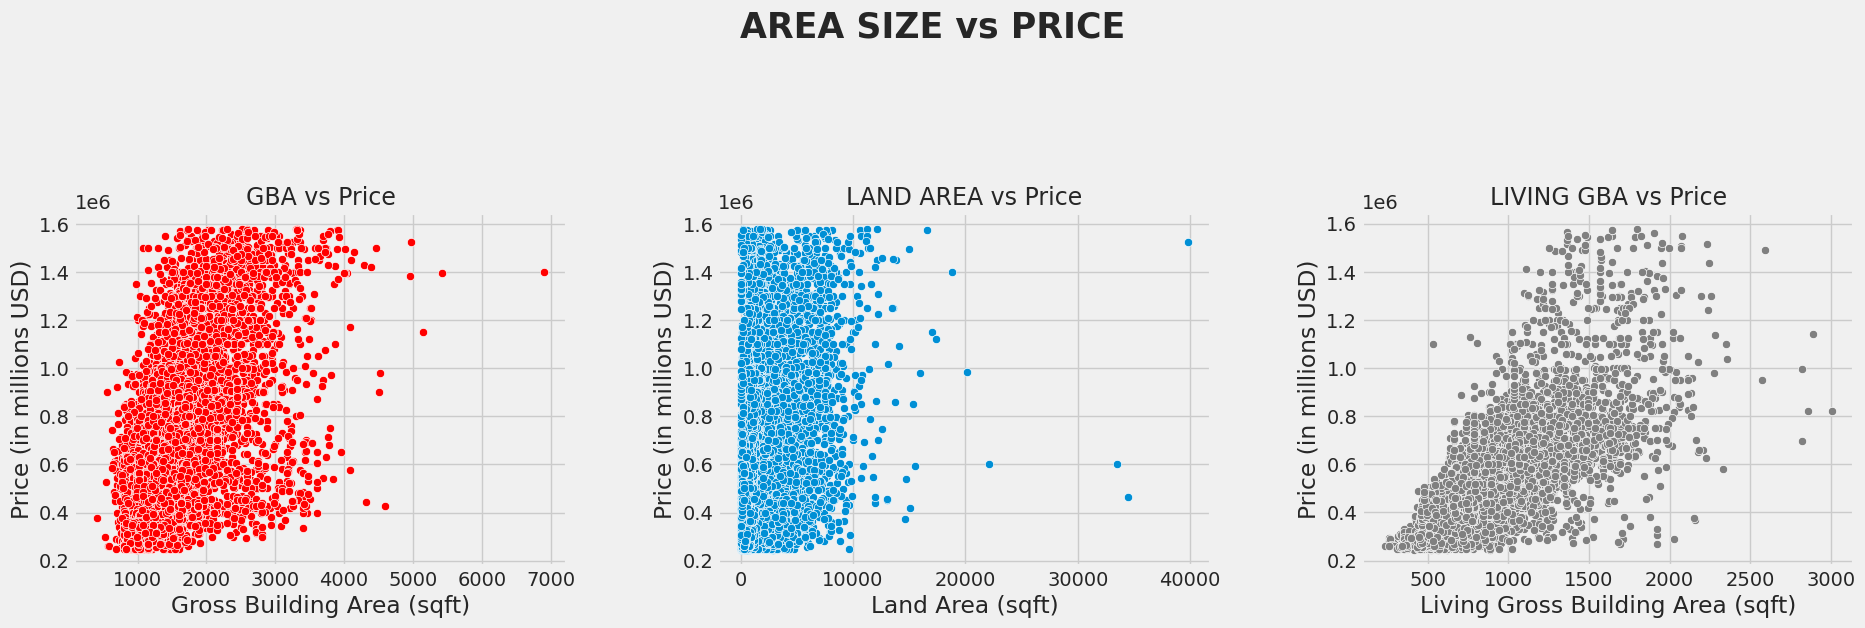

In [43]:
fig, ax =plt.subplots(1,3,figsize=(20,7))
sns.scatterplot(x='GBA',y='PRICE',data=df_viz_95,ax=ax[0],color='r').set_title('GBA vs Price', fontsize=17)
sns.scatterplot(x='LANDAREA',y='PRICE',data=df_viz_95,ax=ax[1]).set_title('LAND AREA vs Price', fontsize=17)
sns.scatterplot(x='LIVING_GBA',y='PRICE',data=df_viz_95,ax=ax[2],color='grey').set_title('LIVING GBA vs Price', fontsize=17)
ax[0].set_xlabel('Gross Building Area (sqft)')
ax[1].set_xlabel('Land Area (sqft)')
ax[2].set_xlabel('Living Gross Building Area (sqft)')
ax[0].set_ylabel('Price (in millions USD)')
ax[1].set_ylabel('Price (in millions USD)')
ax[2].set_ylabel('Price (in millions USD)')
fig.suptitle('AREA SIZE vs PRICE', fontsize=25, fontweight='bold')
fig.tight_layout(pad=4)
plt.show()
     

##Properties Feature

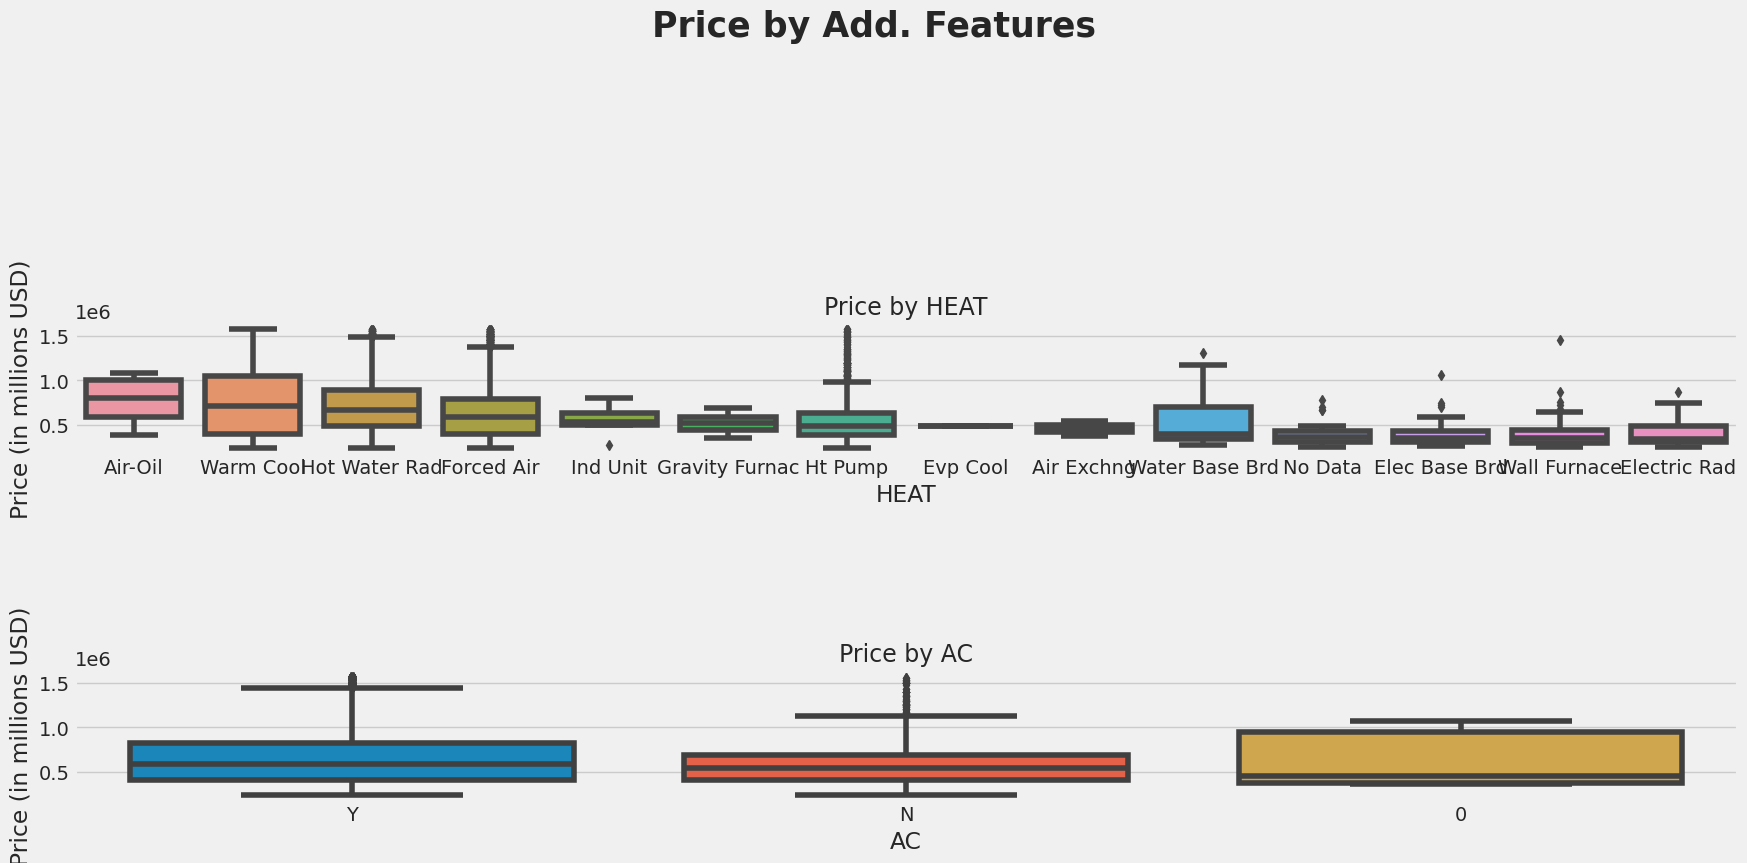

In [44]:
boxplot_cat_price(df=df_viz_95,features=['HEAT','AC','PRICE'],rows=2,cols=1,fig_size=(20,10),title='Price by Add. Features',pad=7)

in **AC**, the **0** value seems to be an N. We might encode it first to get better visualization

In [46]:
add_feat = df_viz_95.copy()
add_feat['AC'] = np.where(df_viz_95['AC']=='Y',1,0) #change to 1,0

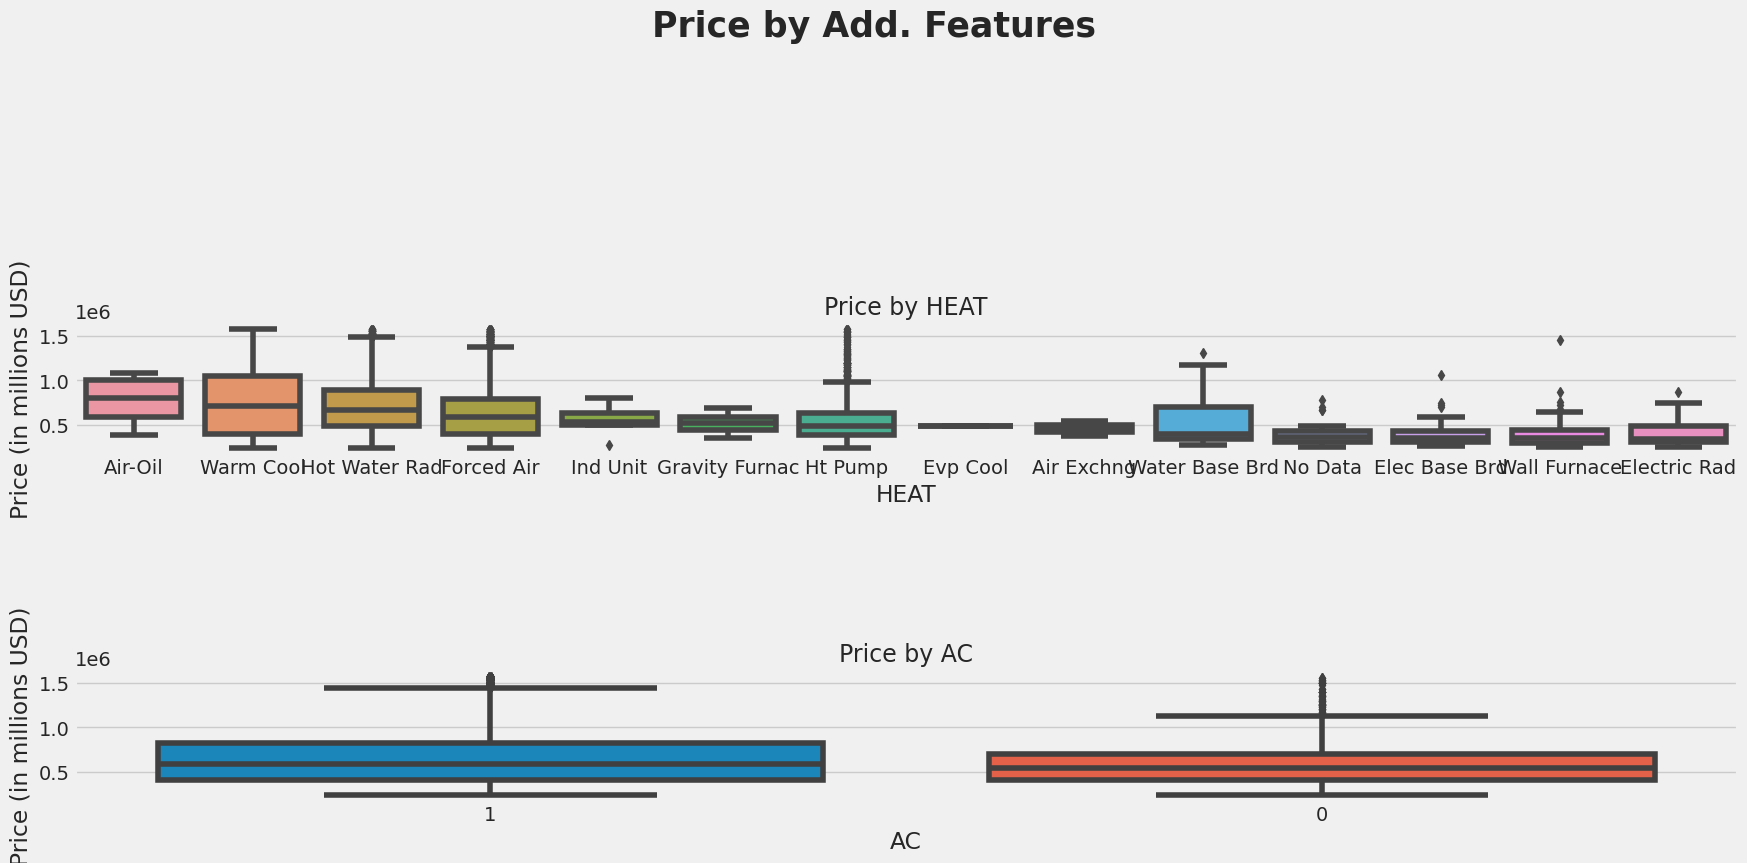

In [48]:
boxplot_cat_price(df=add_feat,features=['HEAT','AC','PRICE'],rows=2,cols=1,fig_size=(20,10),title='Price by Add. Features',pad=7)

In [49]:

for i in ['HEAT','AC']:
  kruskal_price(i,df_q)
  print()

Kruskal-Wallis Test results of HEAT
H Stat = 1044.7485864481932
P = 4.2657494867365144e-215

Kruskal-Wallis Test results of AC
H Stat = 159.2726609564436
P = 2.5964568783808267e-35



Since all the P-Value is below the alpha 0.05, we reject H0 which means the population distribution for each features vs price are different. This shows all three features (**Heat** and **AC**) can distinguish price value.

##Grade and Condition

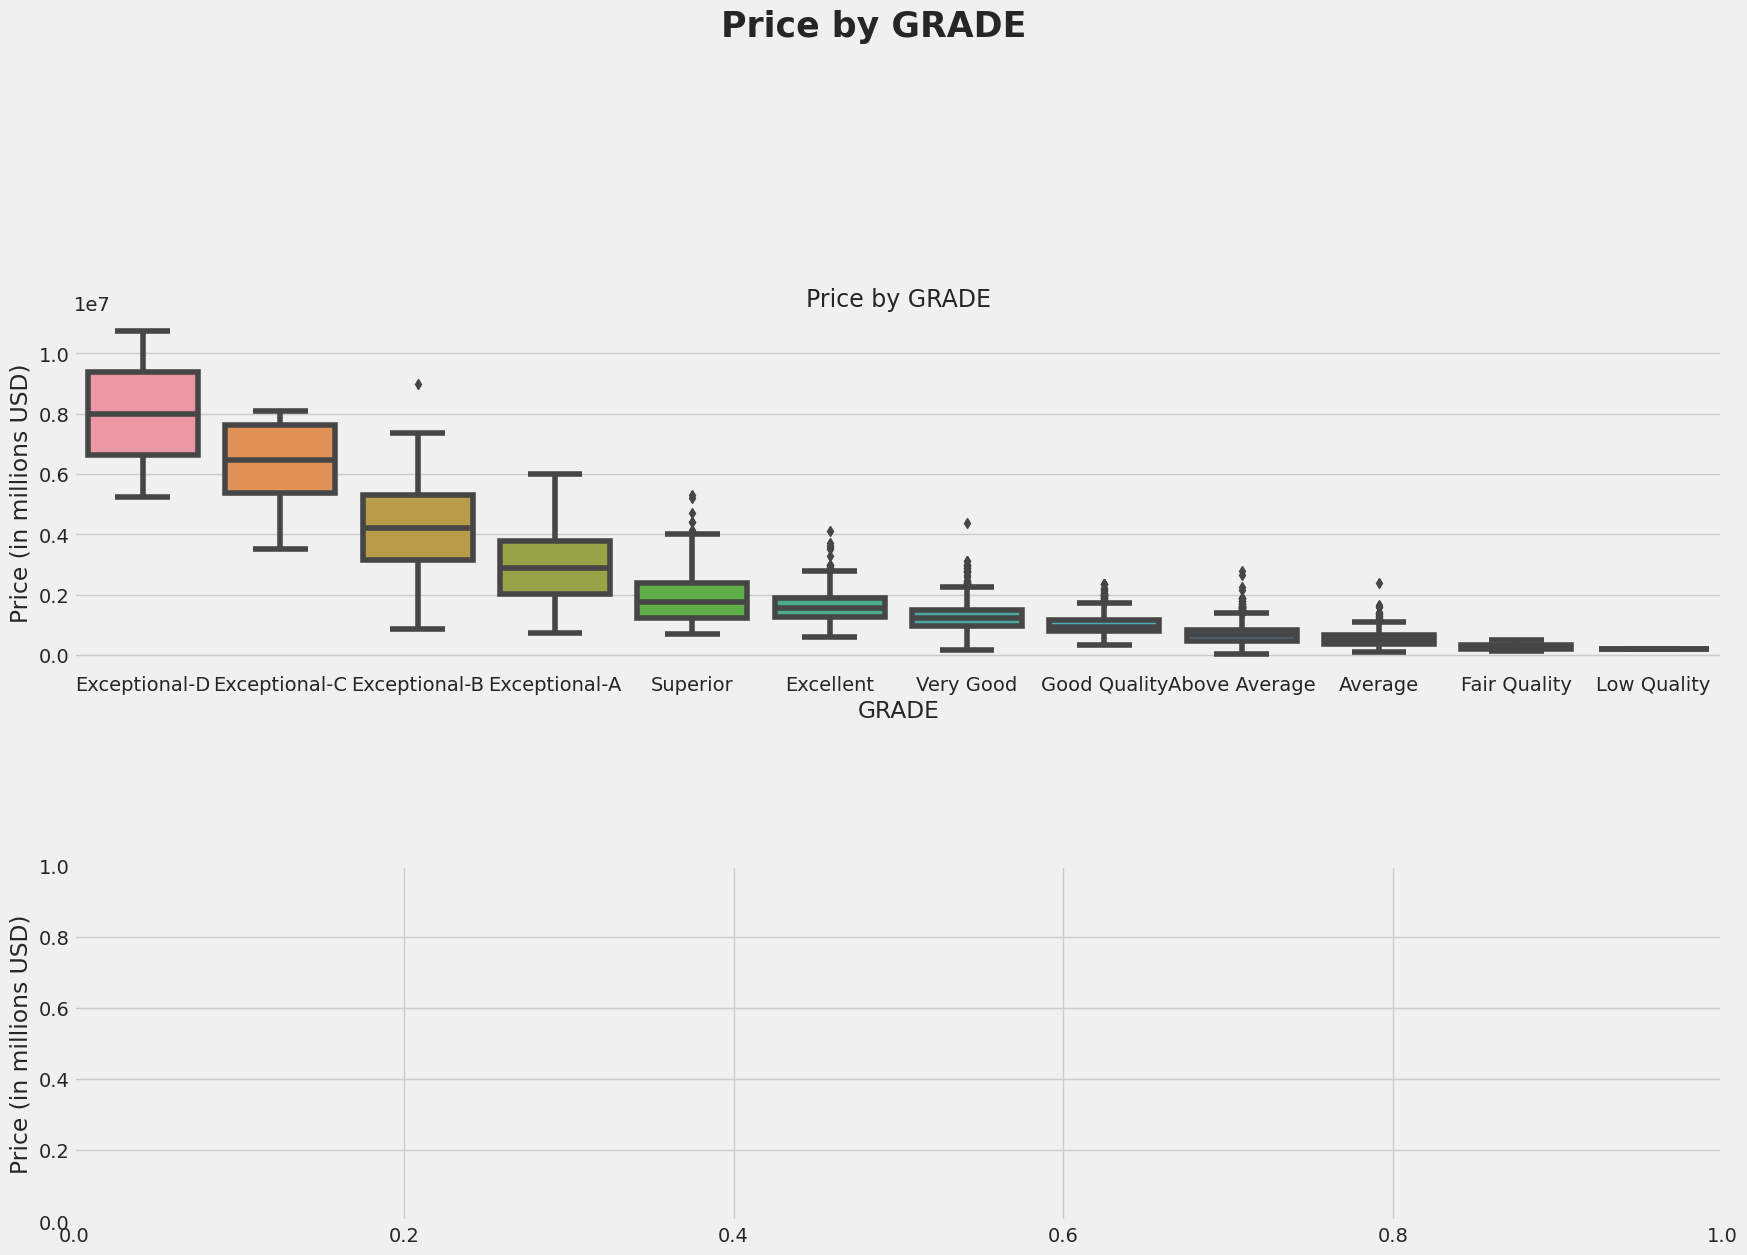

In [50]:
boxplot_cat_price(df=df_t,features=['GRADE','PRICE'],rows=2,cols=1,fig_size=(20,14),title='Price by GRADE',pad=7)


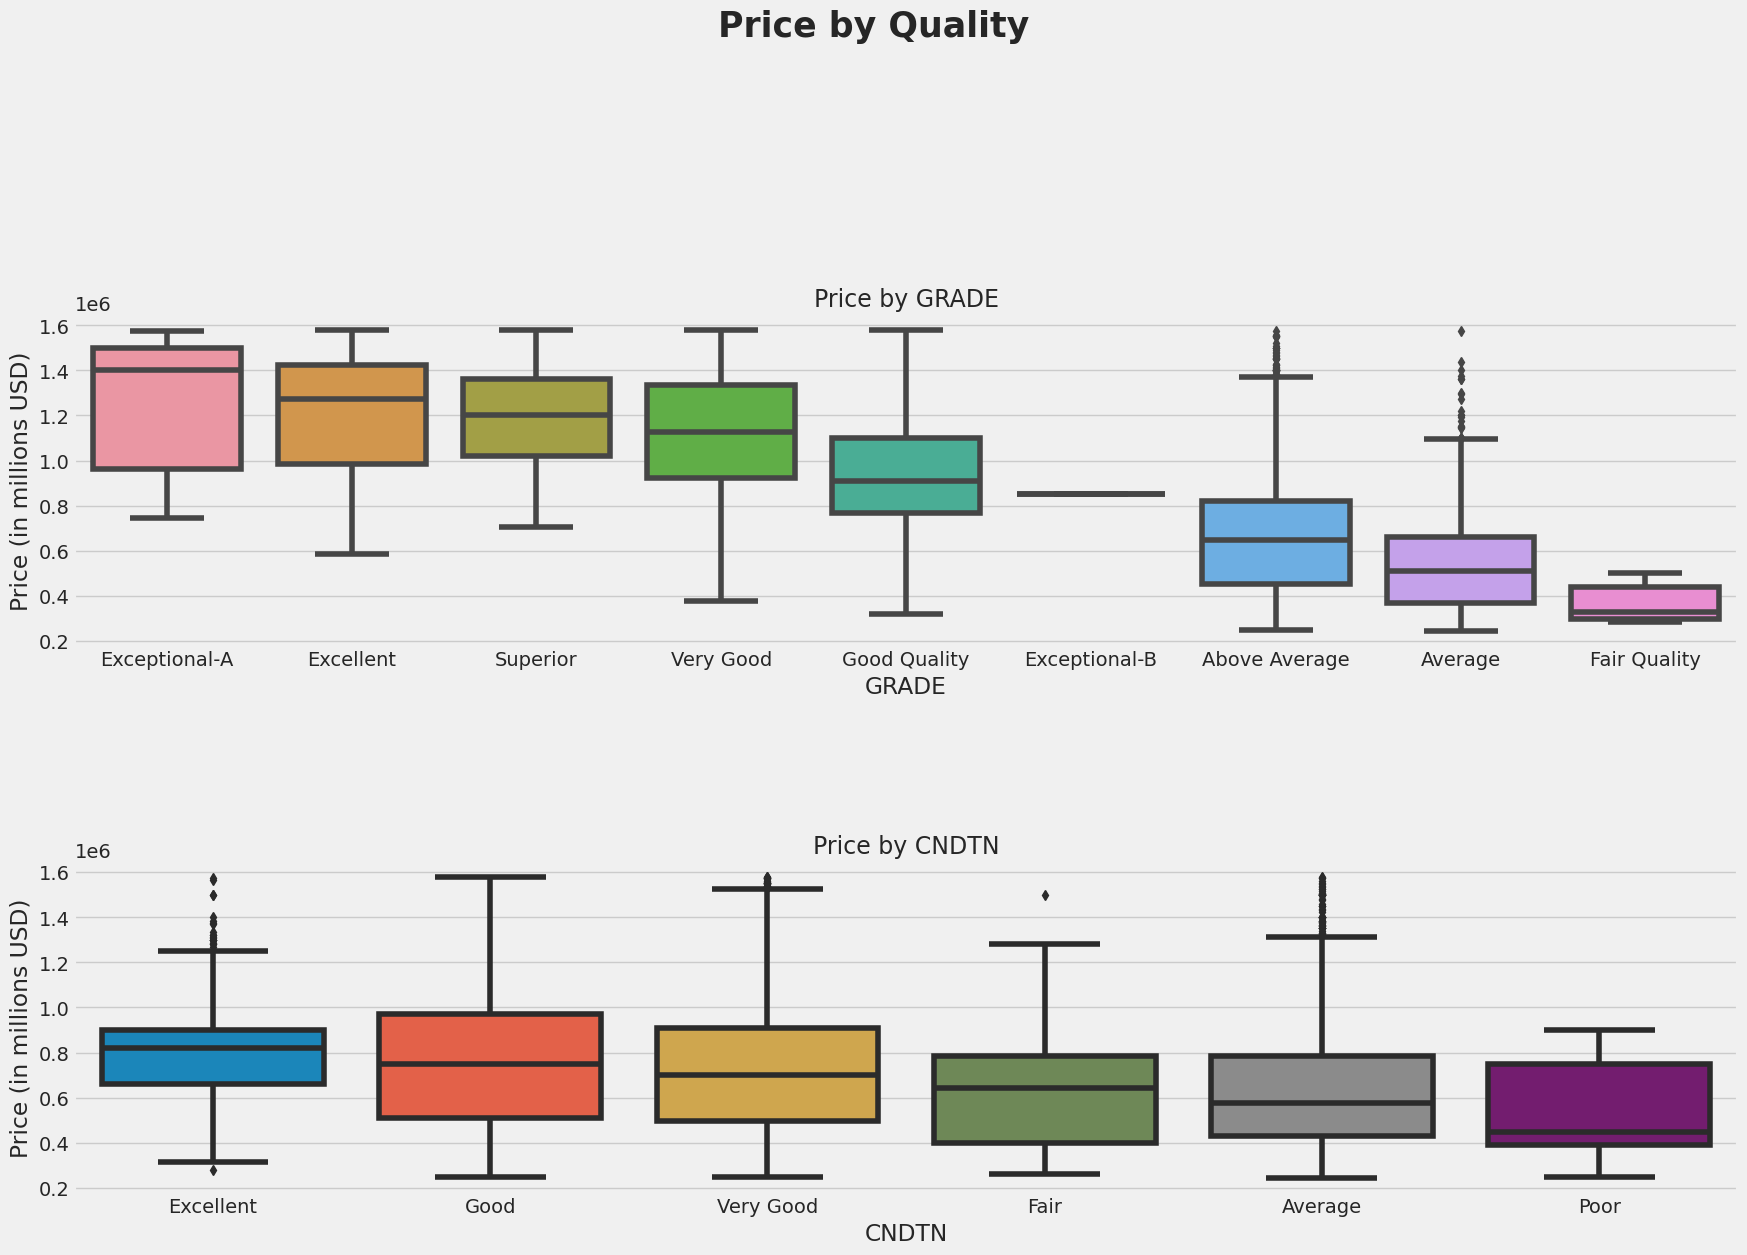

In [51]:

boxplot_cat_price(df=df_viz_95,features=['GRADE','CNDTN','PRICE'],rows=2,cols=1,fig_size=(20,14),title='Price by Quality',pad=7)

In [52]:
for i in ['GRADE','CNDTN']:
  kruskal_price(i,df_q)
  print()
     

Kruskal-Wallis Test results of GRADE
H Stat = 4852.144395991879
P = 0.0

Kruskal-Wallis Test results of CNDTN
H Stat = 587.2787984698359
P = 1.133264142545234e-124



Since all the P-Value is below the alpha 0.05, we reject H0 which means the population distribution for each features vs price are different. This shows both features (**GRADE** and **CNDTN**) can distinguish price value.

##Material and Structure

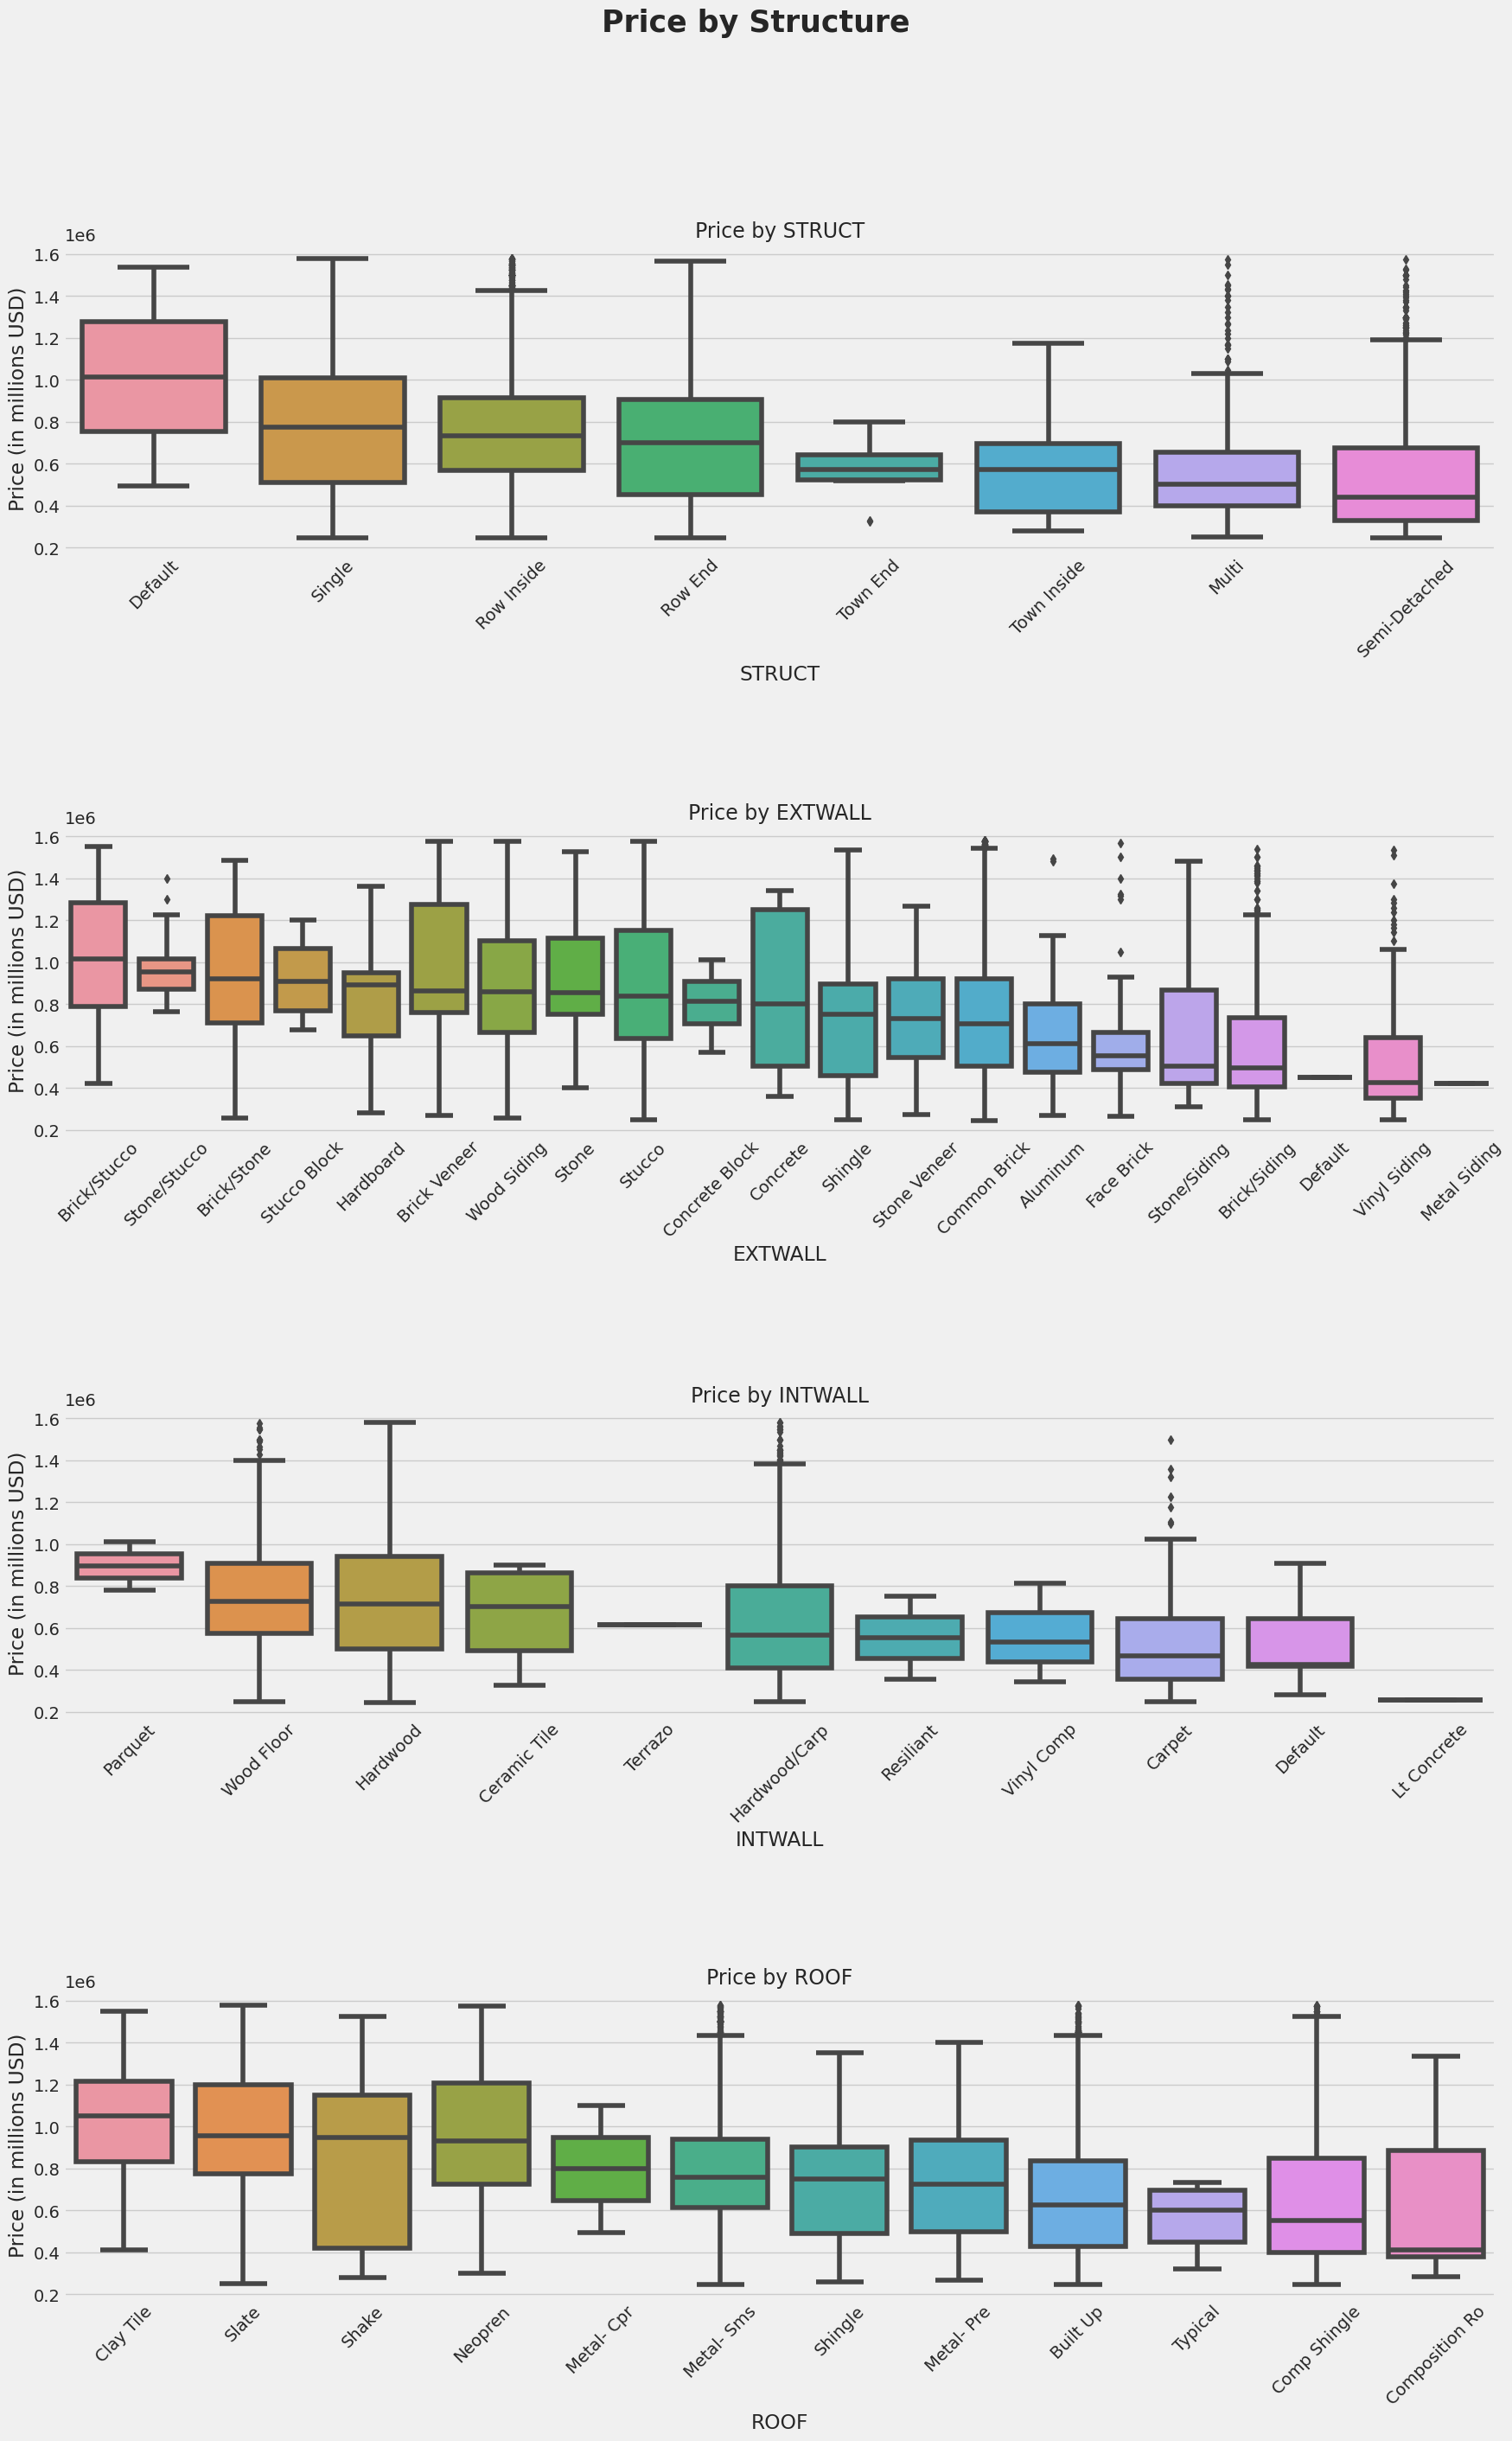

In [53]:
boxplot_cat_price(df=df_viz_95,features=['STRUCT','EXTWALL','INTWALL','ROOF','PRICE'],
                  rows=4,cols=1,fig_size=(20,30),title='Price by Structure',pad=7,rotation=45)

In [54]:
for i in ['STRUCT','EXTWALL','INTWALL','ROOF']:
  kruskal_price(i,df_q)
  print()
  

Kruskal-Wallis Test results of STRUCT
H Stat = 971.6260237809909
P = 1.6252582295221715e-205

Kruskal-Wallis Test results of EXTWALL
H Stat = 837.7805194659105
P = 1.339123142270661e-164

Kruskal-Wallis Test results of INTWALL
H Stat = 266.54397295620305
P = 1.7889081800314212e-51

Kruskal-Wallis Test results of ROOF
H Stat = 1122.4486058898667
P = 8.300982002438826e-234



Since all the P-Value is below the alpha 0.05, we reject H0 which means the population distribution for each features vs price are different. This shows all four features (**Struct**, **Extwall**, **Intwall** and **Roof**) can distinguish price value.



In [55]:
for i in ['ROOMS','BATHRM','HF_BATHRM','KITCHENS','BEDRM','FIREPLACES']:
  kruskal_price(i,df_q)
  print()

Kruskal-Wallis Test results of ROOMS
H Stat = 5662.194814623663
P = 0.0

Kruskal-Wallis Test results of BATHRM
H Stat = 6450.390330804002
P = 0.0

Kruskal-Wallis Test results of HF_BATHRM
H Stat = 3057.0050941238414
P = 0.0

Kruskal-Wallis Test results of KITCHENS
H Stat = 632.0383689910122
P = 2.413268997917351e-134

Kruskal-Wallis Test results of BEDRM
H Stat = 5889.171077467536
P = 0.0

Kruskal-Wallis Test results of FIREPLACES
H Stat = 4243.064502539719
P = 0.0



Since all the P-Value is below the alpha 0.05, we reject H0 which means the population distribution for each features vs price are different. This shows all features (**Rooms**, **Bathrm**, **HF_Bathrm**, **Kitchens**, **Bedrm**, and **Fireplaces**) can distinguish price value.

Next, we would like to see whether any correlation between these features with price

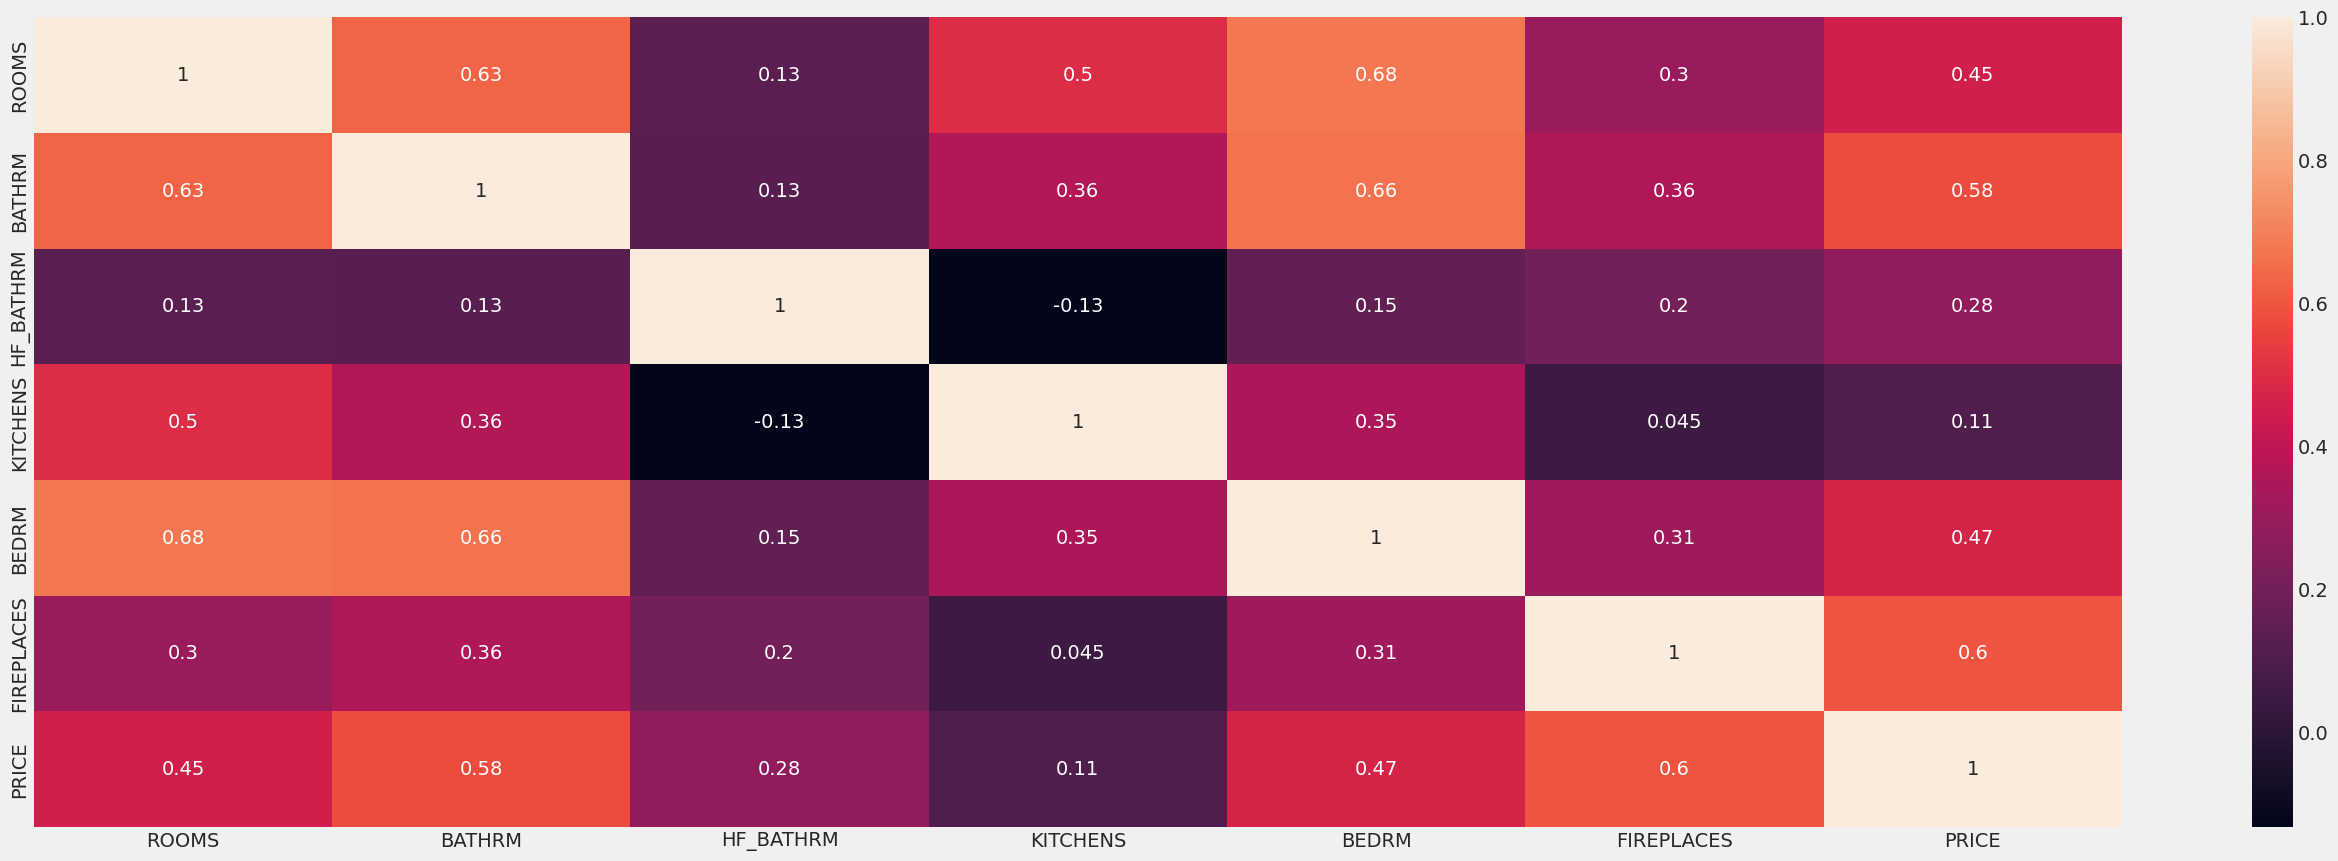

In [56]:
num_feat = df_q[['ROOMS','BATHRM','HF_BATHRM','KITCHENS','BEDRM','FIREPLACES','PRICE']].copy().dropna()
plt.figure(figsize=(30,10))
sns.heatmap(num_feat.corr(), annot=True, cmap='rocket')
plt.show()

##Correlation Network

In order to analyze the correlation between each feature, we will use a correlation network.

In [57]:
%%capture
!pip install network

In [58]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import networkx as nx
corr = df_q.corr()
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.DiGraph(np.array(cor_matrix))

G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)

OutEdgeDataView([('index', 'index', {'weight': 1.0}), ('index', 'BATHRM', {'weight': -0.4628209062382513}), ('index', 'HF_BATHRM', {'weight': -0.4481008148843736}), ('index', 'NUM_UNITS', {'weight': -0.02871434621715297}), ('index', 'ROOMS', {'weight': -0.6380160462143358}), ('index', 'BEDRM', {'weight': -0.6320295412820809}), ('index', 'AYB', {'weight': 0.4041194205291471}), ('index', 'YR_RMDL', {'weight': -0.16974381783888765}), ('index', 'EYB', {'weight': -0.14019000390906322}), ('index', 'STORIES', {'weight': -0.039826376918921526}), ('index', 'PRICE', {'weight': -0.44964854552537514}), ('index', 'SALE_NUM', {'weight': -0.14851226627136677}), ('index', 'GBA', {'weight': -0.24038681086819522}), ('index', 'BLDG_NUM', {'weight': -0.02101716780965032}), ('index', 'KITCHENS', {'weight': -0.061766444848795864}), ('index', 'FIREPLACES', {'weight': -0.021910430722550462}), ('index', 'LANDAREA', {'weight': -0.40963375713305333}), ('index', 'CMPLX_NUM', {'weight': 0.12467297038166683}), ('in

In [60]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10))

    nx.draw_networkx_nodes(H,positions,node_color='#34ebe1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=8)

    if corr_direction == "positive":
        edge_colour = plt.cm.winter 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

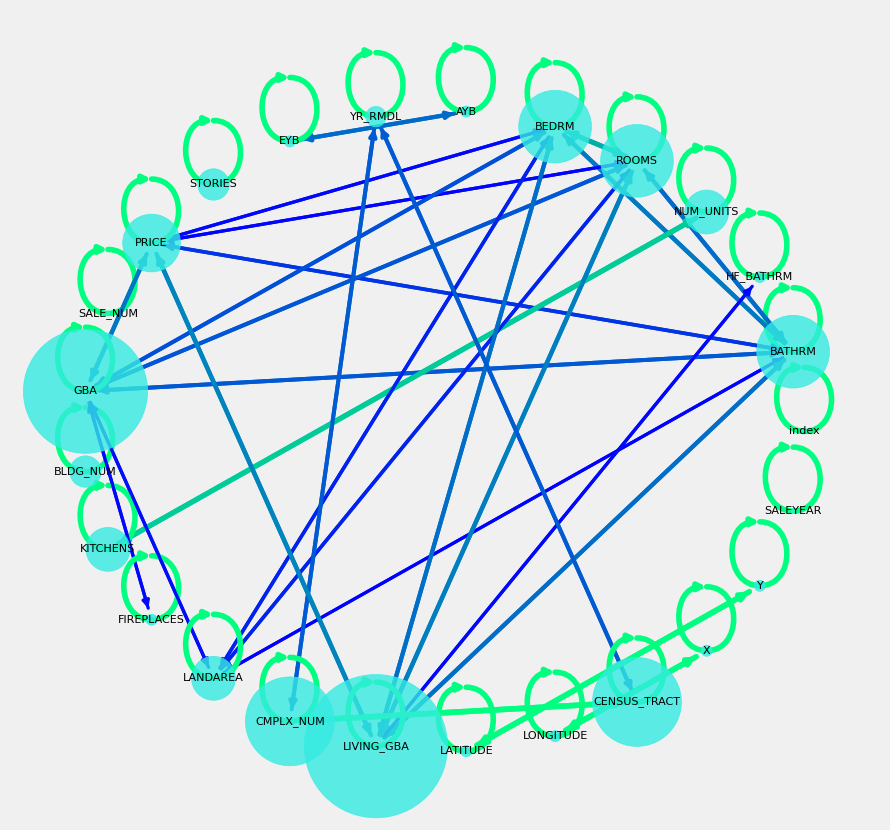

In [61]:

corr_network(G, corr_direction="positive",min_correlation = 0.5)

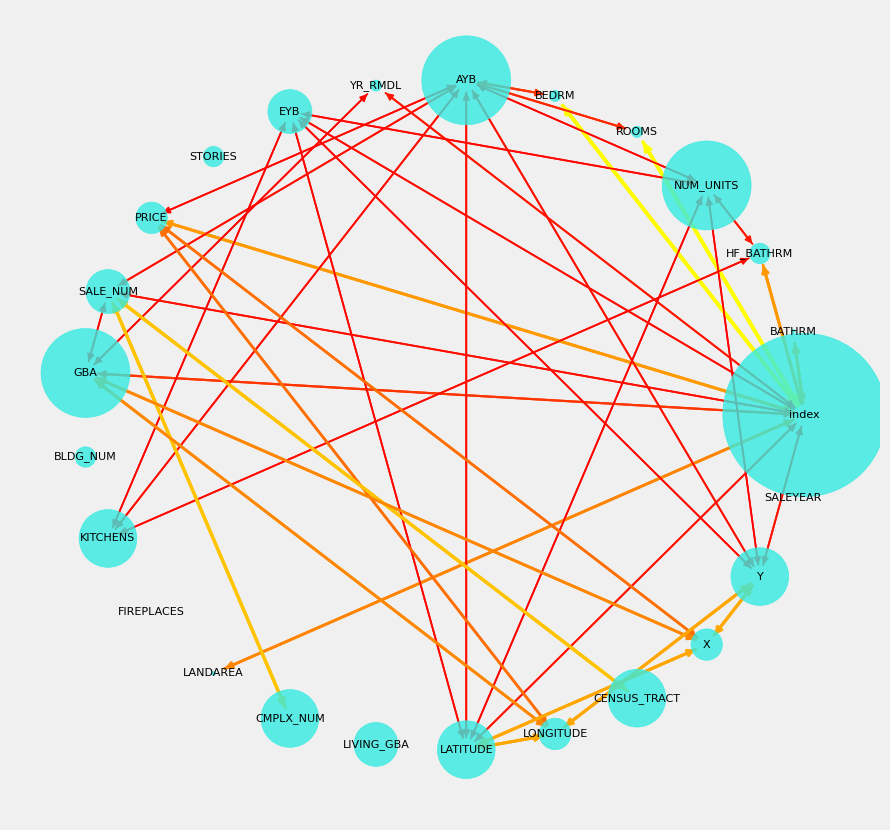

In [62]:

corr_network(G, corr_direction="negative",min_correlation = -0.1)

#Step-2 Data preprocessing

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from scipy import stats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  

# Some styling
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'ggplot2'
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [64]:
raw_data_link = 'https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_data.csv'
df = pd.read_csv(raw_data_link) # using dev set

In [65]:
df.head()

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0      2       3          1  Hot Water Rad  Y        2.0      9      5   
1     18       3          1  Hot Water Rad  Y        2.0     10      4   
2     20       3          1  Hot Water Rad  Y        1.0     14      5   
3     31       3          0     Forced Air  Y        2.0      9      3   
4     34       3          1     Forced Air  Y        2.0     10      3   

      AYB  YR_RMDL  ...  ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD CENSUS_TRACT  \
0  1910.0   2009.0  ...       Old City 2    040 D Old City 2       4201.0   
1  1908.0   2006.0  ...       Old City 2    040 D Old City 2       4201.0   
2  1880.0   2009.0  ...       Old City 2    040 E Old City 2       5201.0   
3  1900.0   2004.0  ...       Old City 2    040 E Old City 2       5201.0   
4  1900.0   2008.0  ...       Old City 2    040 E Old City 2       5201.0   

   CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT SALEYEAR  
0   004201 2006  Ward 2     152 -77.040429  38.914881       NW   2016.0  
1   004201 2005  Ward 2     152 -77.040429  38.914881       NW   2016.0  
2   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2016.0  
3   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2016.0  
4   005201 4003  Ward 2     208 -77.033366  38.911716       NW   2018.0  

[5 rows x 50 columns]

##1. CASTING

In [66]:

#casting data types
def casting(df):
  df['NUM_UNITS'] = df['NUM_UNITS'].astype(pd.Int64Dtype())
  df['AYB'] = df['AYB'].astype(pd.Int64Dtype())
  df['LANDAREA'] = df['LANDAREA'].astype(float)
  df['KITCHENS'] = df['KITCHENS'].astype(pd.Int64Dtype())
  df['USECODE'] = df['USECODE'].astype(pd.Int64Dtype()).astype('category')
  df['ZIPCODE'] = df['ZIPCODE'].astype(pd.Int64Dtype()).astype('category')
  df['CMPLX_NUM'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
  df['CENSUS_TRACT'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
  df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
  return df
     

In [67]:

df1 = casting(df)

In [68]:

def saleyear(df):
  df['SALEYEAR'] = df['SALEDATE'].dt.year
  return df
     

In [69]:
df2 = saleyear(df1)

## 2. QUALIFIED FEATURES

The **QUALIFIED feature** is internally-used indicator to reflect if a sale is representative of market value according to the office's internal criteria. Since the **U** means it does not reflect the market value, we will drop the **U** value and **QUALIFIED** feature since it only contains 1 value of **Q**.

In [70]:
def drop_qualified(df):
  df = df[df['QUALIFIED']=='Q']
  df = df.drop('QUALIFIED', axis=1)
  
  return df

In [71]:
df[(df['QUALIFIED']=='U') & (df['PRICE']>0) & (df['SALEYEAR']>2010) & (df['ROOMS']<=6) & (df['GBA']>1204) & (df['LANDAREA']>1425) & (df['AYB']>1914) & (df['EYB']>1964) & (df['PRICE']>500000) & (df['WARD']=='Ward 5')]
     

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
11117  76793       3          0     Forced Air  Y          1      6      4   
11300  78056       3          1      Warm Cool  Y          1      6      4   
11410  78757       1          1  Hot Water Rad  N          1      6      3   

        AYB  YR_RMDL  ...  ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD CENSUS_TRACT  \
11117  1940   2010.0  ...        Woodridge     056 C Woodridge         <NA>   
11300  1925   2017.0  ...        Woodridge     056 A Woodridge         <NA>   
11410  1935   2004.0  ...        Brookland     007 D Brookland         <NA>   

       CENSUS_BLOCK    WARD  SQUARE          X          Y QUADRANT SALEYEAR  
11117   011100 3006  Ward 5    4213 -76.974893  38.924060       NE     2016  
11300   009400 4018  Ward 5    4225 -76.974573  38.934784       NE     2017  
11410   009301 3012  Ward 5    4134 -76.980474  38.927802       NE     2016  

[3 rows x 50 columns]

In [72]:
df3 = drop_qualified(df2)
    
print('Before removing unqualified:', df2.shape)
print('After removing unqualified:', df3.shape)

Before removing unqualified: (26573, 50)
After removing unqualified: (16072, 49)


##3. MISSING DATA

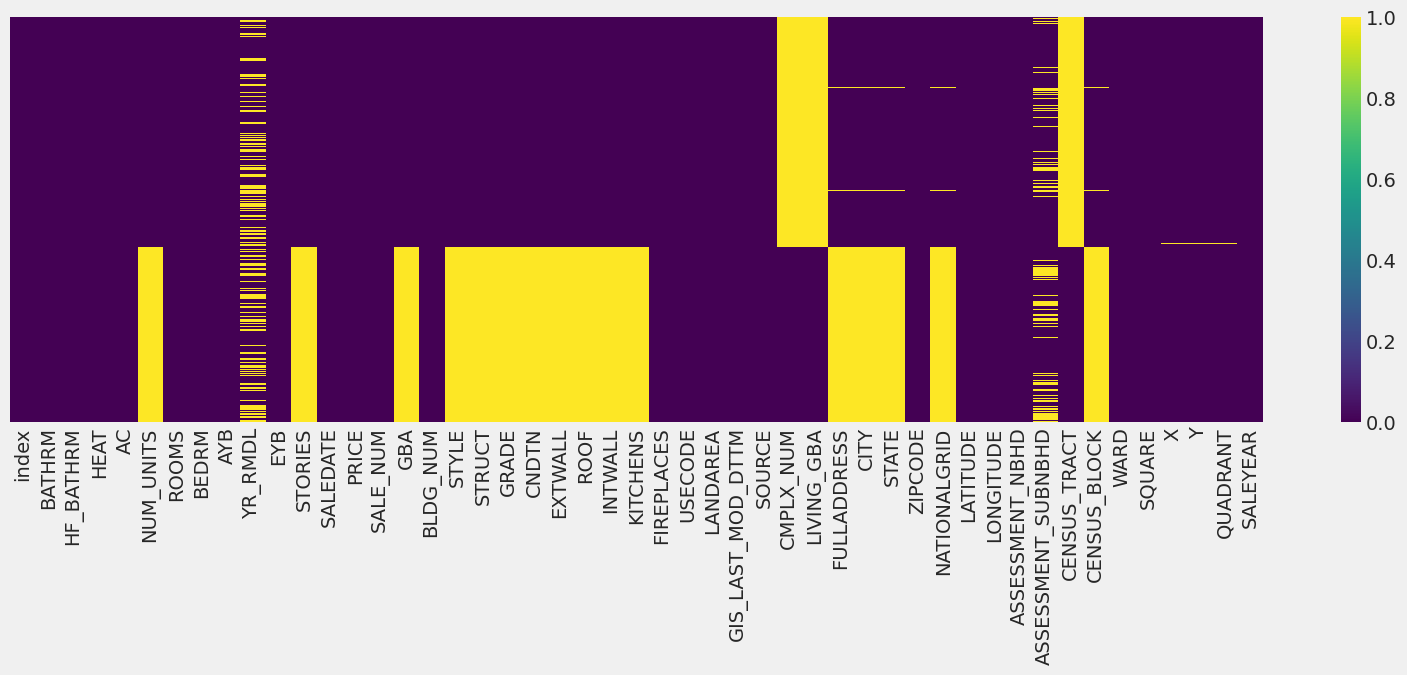

In [73]:
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(df3.isnull(), yticklabels=False, cmap='viridis')
plt.show()

Since the missing values seems to have a pattern, we might want to dig deeper into the source (**residential** & **condominium**)

In [74]:
res = df3[df3['SOURCE']=='Residential']
con = df3[df3['SOURCE']=='Condominium']

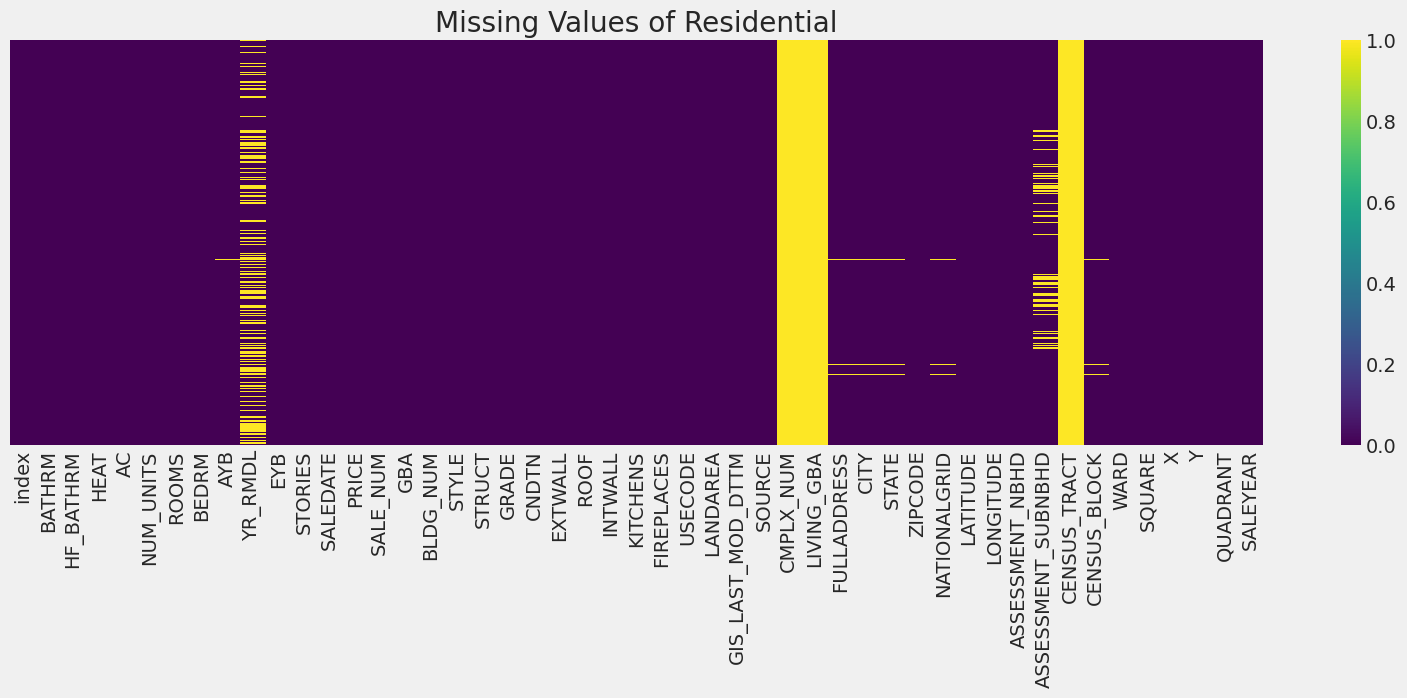

In [75]:
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(res.isnull(), yticklabels=False,cmap='viridis').set_title('Missing Values of Residential')
plt.show()

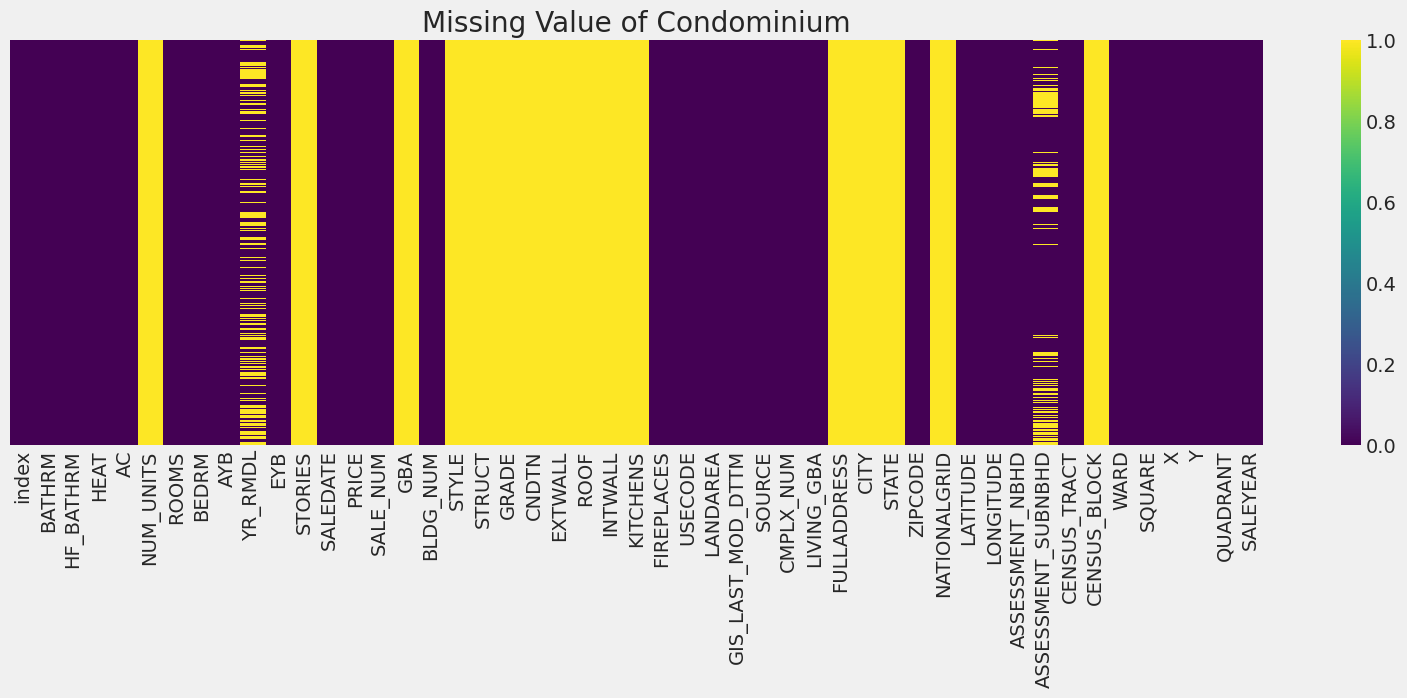

In [76]:
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(con.isnull(), yticklabels=False,cmap='viridis').set_title('Missing Value of Condominium')
plt.show()

Clearly, they both have several different features. We assume that the price predictor model of residential and condominium will be different. The condominium data seems to have more missing value than the residential. In this case, we decide to build the price predictor for **residential** property only.

In [77]:
def residential(df):
  df = df[df['SOURCE']=='Residential']
  return df
     

In [78]:
df4 = residential(df3)

In [79]:
df4.shape

(9112, 49)

Dropping unused features :

* **CMPLX_NUM**, **LIVING_GBA**, **CENSUS_TRACT** : only available in condominium data
* **ASSESSMENT_SUBNBHD**, **FULLADDRESS**, **NATIONAL GRID**, and **CENSUS_BLOCK** : high cardinality
* **CITY**, **STATE** : single value (Washington, DC)
* X, Y : same value with **LONGITUDE** and **LATITUDE**
* **SALEDATE** : replaced with **SALEYEAR**

In [80]:
def drop_unused_features(df):
    df = df.drop(['CMPLX_NUM','LIVING_GBA','CENSUS_TRACT','ASSESSMENT_SUBNBHD',
                   'FULLADDRESS','NATIONALGRID','CENSUS_BLOCK','CITY','STATE',
                   'X','Y','SALEDATE'],axis=1)
    return df
     
df5 = drop_unused_features(df4)
df5.head(10)

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM   AYB  \
0       2       3          1  Hot Water Rad  Y          2      9      5  1910   
6      41       3          1      Warm Cool  Y          2      9      4  1880   
7      43       3          1     Forced Air  Y          2     13      4  1800   
8      44       3          2     Forced Air  Y          2     10      4  1800   
11     81       2          1      Warm Cool  Y          2     11      3  1979   
12     90       6          0  Hot Water Rad  N          4     18      4  1940   
15    105       5          0      Warm Cool  Y          3     10      6  1925   
16    118       2          1      Warm Cool  Y          2      9      3  1897   
17    119       3          1      Warm Cool  Y          1     11      5  1883   
19    138       2          2      Warm Cool  Y          2      8      5  1906   

    YR_RMDL  ...    GIS_LAST_MOD_DTTM       SOURCE  ZIPCODE   LATITUDE  \
0    2009.0  ...  2018-07-22 18:01:43  Residential    20009  38.914684   
6    2016.0  ...  2018-07-22 18:01:43  Residential    20009  38.911710   
7    2006.0  ...  2018-07-22 18:01:43  Residential    20009  38.911704   
8    2016.0  ...  2018-07-22 18:01:43  Residential    20009  38.911706   
11   2014.0  ...  2018-07-22 18:01:43  Residential    20009  38.915955   
12      NaN  ...  2018-07-22 18:01:43  Residential    20009  38.915004   
15   2005.0  ...  2018-07-22 18:01:43  Residential    20009  38.911333   
16   2004.0  ...  2018-07-22 18:01:43  Residential    20009  38.911703   
17   1935.0  ...  2018-07-22 18:01:43  Residential    20009  38.911703   
19   2015.0  ...  2018-07-22 18:01:43  Residential    20009  38.915356   

    LONGITUDE  ASSESSMENT_NBHD    WARD SQUARE QUADRANT SALEYEAR  
0  -77.040678       Old City 2  Ward 2    152       NW     2016  
6  -77.033087       Old City 2  Ward 2    208       NW     2016  
7  -77.032884       Old City 2  Ward 2    208       NW     2018  
8  -77.032815       Old City 2  Ward 2    208       NW     2017  
11 -77.037863       Old City 2  Ward 2    176       NW     2017  
12 -77.037508       Old City 2  Ward 2    177       NW     2017  
15 -77.045640       Old City 2  Ward 2     93       NW     2016  
16 -77.045689       Old City 2  Ward 2     93       NW     2018  
17 -77.045624       Old City 2  Ward 2     93       NW     2017  
19 -77.040547       Old City 2  Ward 2    152       NW     2017  

[10 rows x 37 columns]

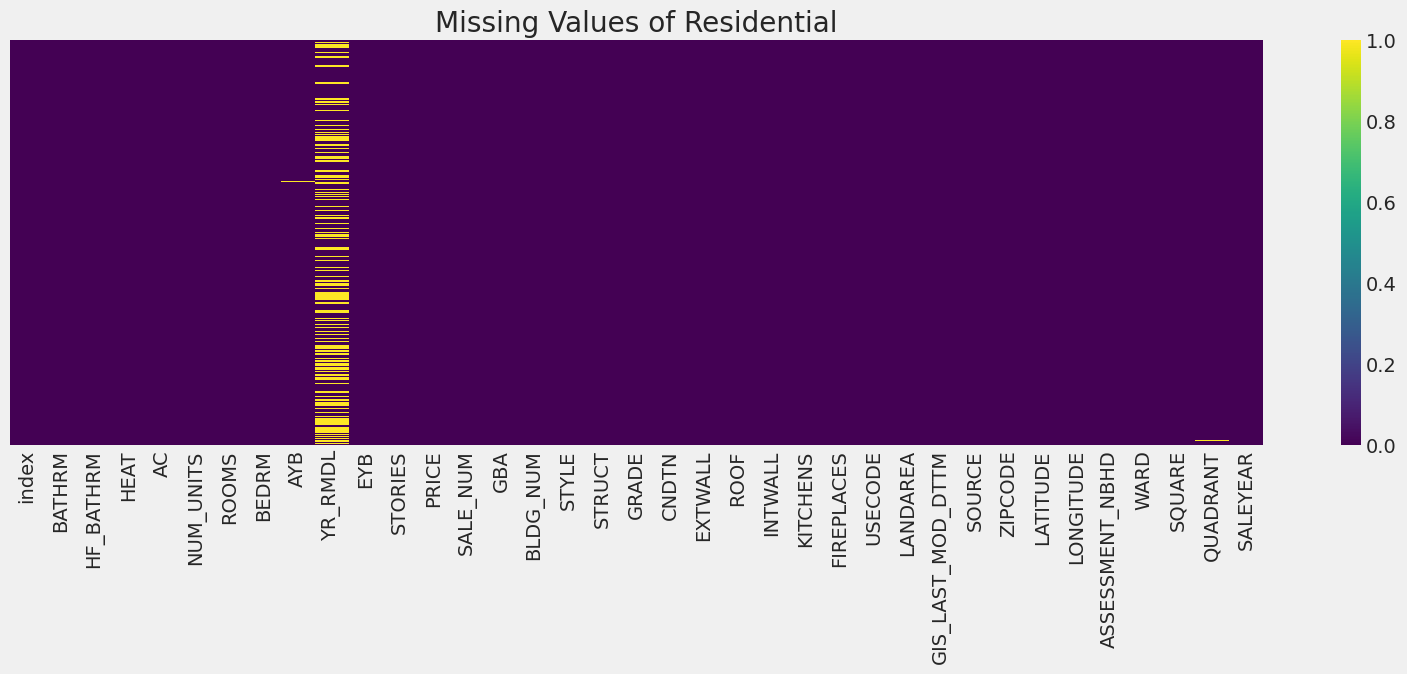

In [81]:
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(df5.isnull(), yticklabels=False,cmap='viridis').set_title('Missing Values of Residential')
plt.show()

The **YR_RMDL** features seems too important to drop. Intuitively, whether the properties have been remodeled or not will affect the price. We decide to do feature engineering by converting the **YR_RMDL** into RMDL, which is (**1**/**0**). **1** means the property has been remodeled and vice versa

In [82]:

#feature engineering YR_RMDL
def yr_rmdl(df):
    df['RMDL'] = np.where(df['YR_RMDL'].isna(),0,1)
    df = df.drop('YR_RMDL',axis=1)
    return df

In [83]:
df6 = yr_rmdl(df5)
df6.head(10)

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM   AYB  \
0       2       3          1  Hot Water Rad  Y          2      9      5  1910   
6      41       3          1      Warm Cool  Y          2      9      4  1880   
7      43       3          1     Forced Air  Y          2     13      4  1800   
8      44       3          2     Forced Air  Y          2     10      4  1800   
11     81       2          1      Warm Cool  Y          2     11      3  1979   
12     90       6          0  Hot Water Rad  N          4     18      4  1940   
15    105       5          0      Warm Cool  Y          3     10      6  1925   
16    118       2          1      Warm Cool  Y          2      9      3  1897   
17    119       3          1      Warm Cool  Y          1     11      5  1883   
19    138       2          2      Warm Cool  Y          2      8      5  1906   

     EYB  ...       SOURCE  ZIPCODE   LATITUDE  LONGITUDE  ASSESSMENT_NBHD  \
0   1984  ...  Residential    20009  38.914684 -77.040678       Old City 2   
6   1967  ...  Residential    20009  38.911710 -77.033087       Old City 2   
7   1967  ...  Residential    20009  38.911704 -77.032884       Old City 2   
8   1967  ...  Residential    20009  38.911706 -77.032815       Old City 2   
11  1990  ...  Residential    20009  38.915955 -77.037863       Old City 2   
12  1957  ...  Residential    20009  38.915004 -77.037508       Old City 2   
15  1972  ...  Residential    20009  38.911333 -77.045640       Old City 2   
16  2004  ...  Residential    20009  38.911703 -77.045689       Old City 2   
17  1972  ...  Residential    20009  38.911703 -77.045624       Old City 2   
19  1972  ...  Residential    20009  38.915356 -77.040547       Old City 2   

      WARD SQUARE QUADRANT SALEYEAR RMDL  
0   Ward 2    152       NW     2016    1  
6   Ward 2    208       NW     2016    1  
7   Ward 2    208       NW     2018    1  
8   Ward 2    208       NW     2017    1  
11  Ward 2    176       NW     2017    1  
12  Ward 2    177       NW     2017    0  
15  Ward 2     93       NW     2016    1  
16  Ward 2     93       NW     2018    1  
17  Ward 2     93       NW     2017    1  
19  Ward 2    152       NW     2017    1  

[10 rows x 37 columns]

In [84]:

df6.shape

(9112, 37)

In [85]:
# drop remaining missing values (price)
def drop_all(df):
  df = df.dropna()
  return df

In [86]:
df7 = drop_all(df6)
df7.shape

(9067, 37)

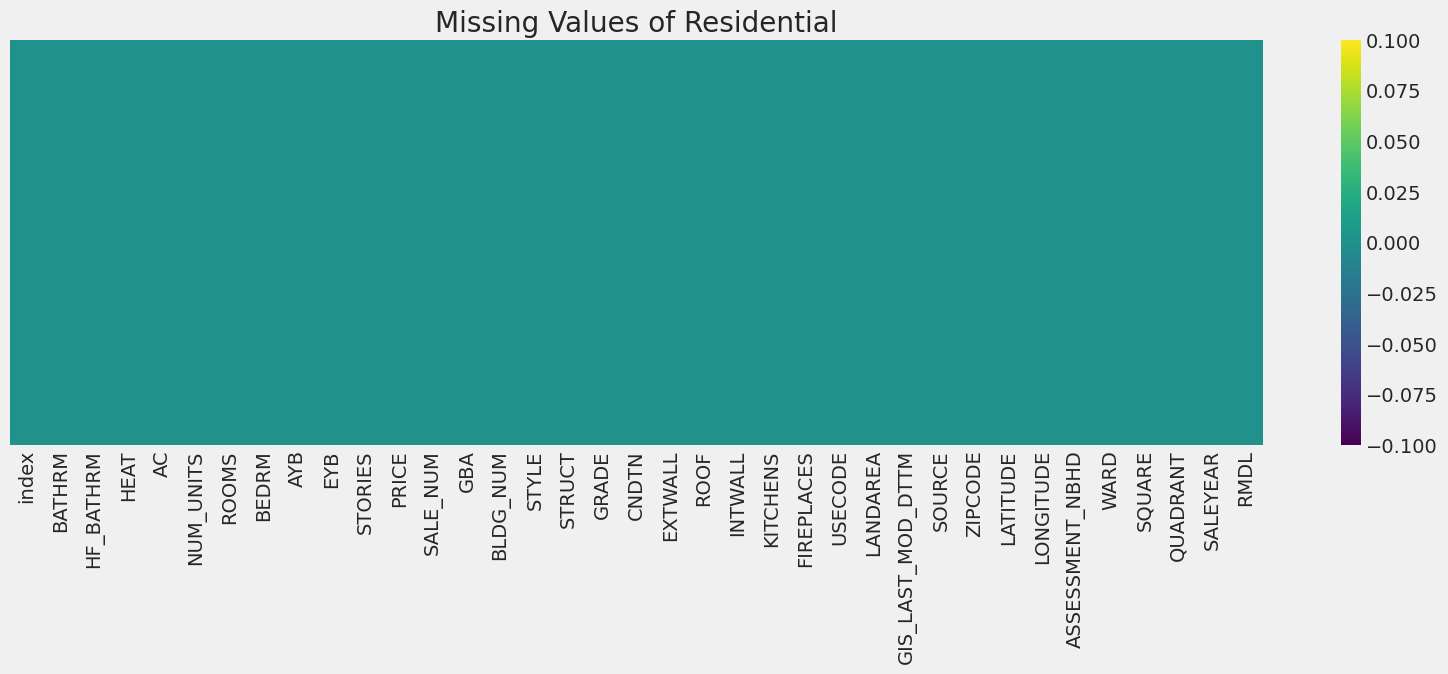

In [87]:
fig, ax = plt.subplots(figsize=(18,5))
sns.heatmap(df7.isnull(), yticklabels=False,cmap='viridis').set_title('Missing Values of Residential')
plt.show()

##4. UNRELATED COLUMNS

In [88]:
def drop_unrelated_features(df):
    df = df.drop(['GIS_LAST_MOD_DTTM','SOURCE'],axis=1)
    return df
    

In [89]:
df8 = drop_unrelated_features(df7)

df8.shape

(9067, 35)

##5. UNUSUAL VALUES

In [90]:
df8['AC'].value_counts() #checking unusual values of AC (0)

Y    7424
N    1640
0       3
Name: AC, dtype: int64

In [91]:
df7.head()

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM   AYB  \
0       2       3          1  Hot Water Rad  Y          2      9      5  1910   
6      41       3          1      Warm Cool  Y          2      9      4  1880   
7      43       3          1     Forced Air  Y          2     13      4  1800   
8      44       3          2     Forced Air  Y          2     10      4  1800   
11     81       2          1      Warm Cool  Y          2     11      3  1979   

     EYB  ...       SOURCE  ZIPCODE   LATITUDE  LONGITUDE  ASSESSMENT_NBHD  \
0   1984  ...  Residential    20009  38.914684 -77.040678       Old City 2   
6   1967  ...  Residential    20009  38.911710 -77.033087       Old City 2   
7   1967  ...  Residential    20009  38.911704 -77.032884       Old City 2   
8   1967  ...  Residential    20009  38.911706 -77.032815       Old City 2   
11  1990  ...  Residential    20009  38.915955 -77.037863       Old City 2   

      WARD SQUARE QUADRANT SALEYEAR RMDL  
0   Ward 2    152       NW     2016    1  
6   Ward 2    208       NW     2016    1  
7   Ward 2    208       NW     2018    1  
8   Ward 2    208       NW     2017    1  
11  Ward 2    176       NW     2017    1  

[5 rows x 37 columns]

Convert **AC** to **1** and **0** (values of **0** is considered as **N**)

In [92]:
df7["AC"].value_counts().index


Index(['Y', 'N', '0'], dtype='object')

In [ ]:
# shubshanni

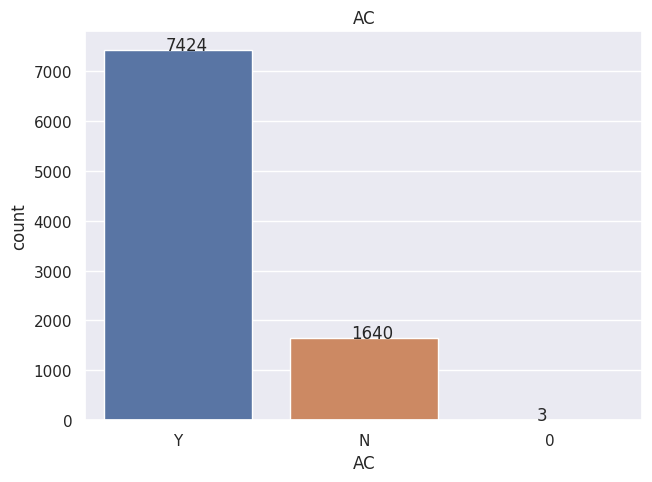

In [93]:
sns.set(style='darkgrid')
ax = sns.countplot(x=df7["AC"],data=df7,order = df7["AC"].value_counts().index)
plt.title('AC')

for p, label in zip(ax.patches, df7["AC"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.33, p.get_height()+0.5))

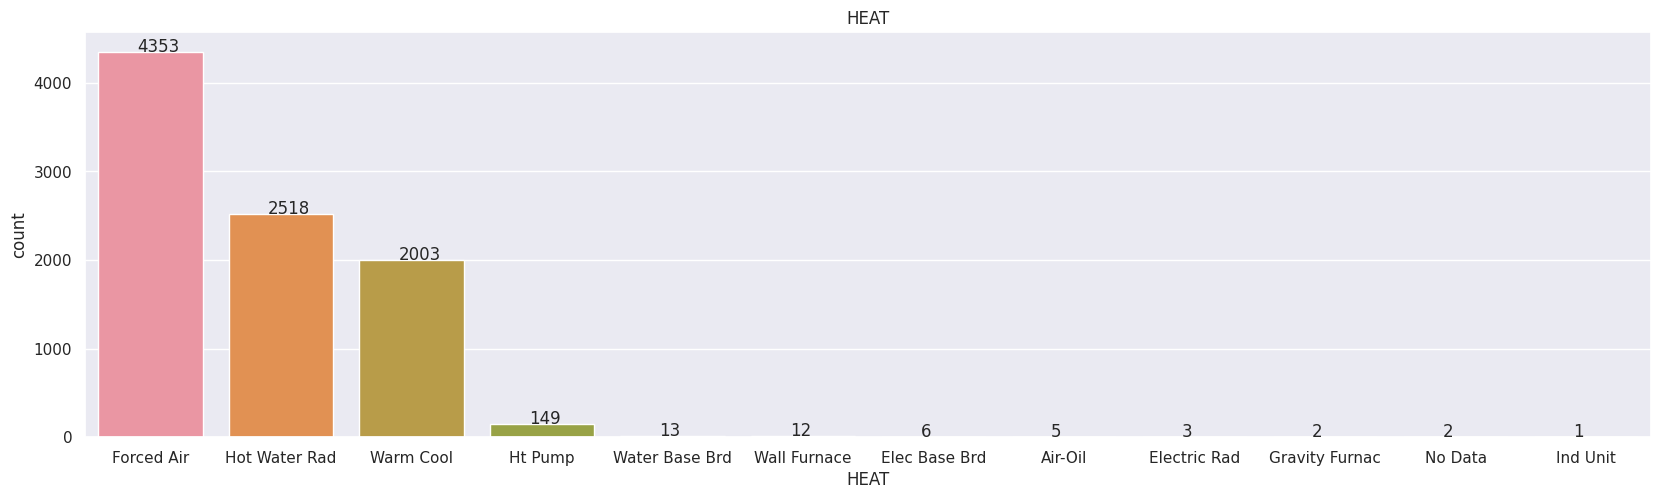

In [94]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=df7["HEAT"], data=df7,order = df7["HEAT"].value_counts().index)
plt.title('HEAT')

for p, label in zip(ax.patches, df7["HEAT"].value_counts().values):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+0.5))

In [95]:
df8['HEAT'].value_counts() # checking unusual values of HEAT (No Data)

Forced Air        4353
Hot Water Rad     2518
Warm Cool         2003
Ht Pump            149
Water Base Brd      13
Wall Furnace        12
Elec Base Brd        6
Air-Oil              5
Electric Rad         3
Gravity Furnac       2
No Data              2
Ind Unit             1
Name: HEAT, dtype: int64

Since **No Data** of **HEAT** is considered small, we will drop the records containing it.

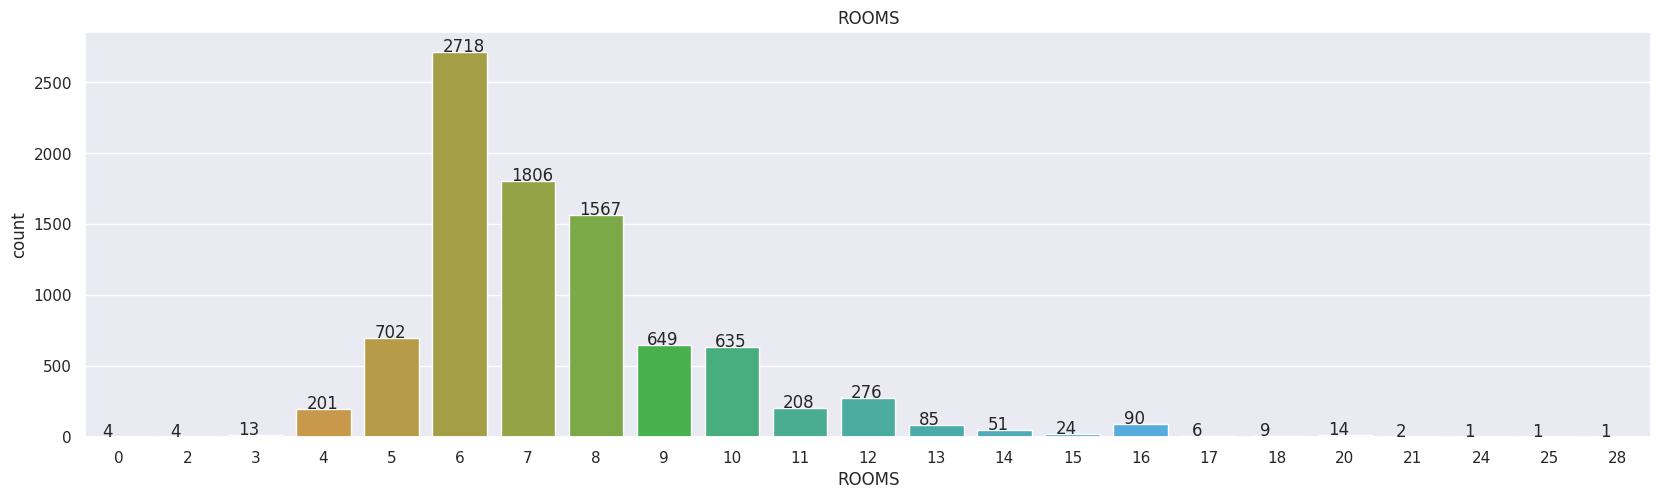

In [96]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x=df7["ROOMS"],data=df7,order = df7["ROOMS"].value_counts().sort_index().index)
plt.title('ROOMS')

for p, label in zip(ax.patches, df7["ROOMS"].value_counts().sort_index().values):
    ax.annotate(label, (p.get_x()+0.15, p.get_height()+0.5))

In [97]:
df8['ROOMS'].value_counts().sort_index() # checking unusual values of ROOMS (0)

0        4
2        4
3       13
4      201
5      702
6     2718
7     1806
8     1567
9      649
10     635
11     208
12     276
13      85
14      51
15      24
16      90
17       6
18       9
20      14
21       2
24       1
25       1
28       1
Name: ROOMS, dtype: int64

We will drop properties with **0** room which is highly unlikely

In [98]:
df8[df8['AYB'] > df8['SALEYEAR']].shape #checking unusual values of interaction between AYB & SALEYEAR

(6, 35)

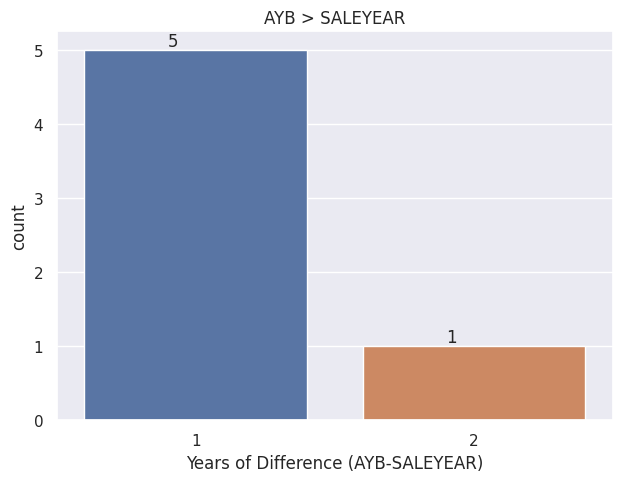

In [99]:
diff_ayb_saleyear = df8[df8['AYB'] > df8['SALEYEAR']]
ax = sns.countplot(x=diff_ayb_saleyear['AYB'] - diff_ayb_saleyear['SALEYEAR'],data=diff_ayb_saleyear)
# (x=df7["ROOMS"],data=df7,order = df7["ROOMS"].value_counts().sort_index().index)
plt.title('AYB > SALEYEAR')
plt.xlabel('Years of Difference (AYB-SALEYEAR)')
for p, label in zip(ax.patches, (diff_ayb_saleyear['AYB'] - diff_ayb_saleyear['SALEYEAR']).value_counts().sort_index().values):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+0.05))
plt.show() 

We assume there is no sold properties before the properties has been built. Since these values is scarce, we will exclude the records

In [100]:
df8[df8['AYB'] > df8['EYB']].shape #checking unusual values of interaction between AYB & EYB

(1, 35)

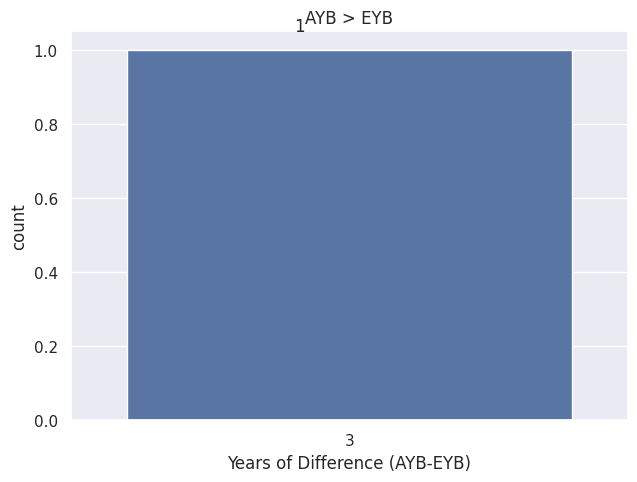

In [101]:
diff_ayb_eyb = df8[df8['AYB'] > df8['EYB']]
ax = sns.countplot(x=diff_ayb_eyb['AYB'] - diff_ayb_eyb['EYB'],data=diff_ayb_saleyear)
plt.title('AYB > EYB')
plt.xlabel('Years of Difference (AYB-EYB)')
for p, label in zip(ax.patches, (diff_ayb_eyb['AYB'] - diff_ayb_eyb['EYB']).value_counts().sort_index().values):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+0.05))
plt.show()

Based on the Author explanation of the dataset, the **EYB** should be more recent than the **AYB**. We found 3 unusual values, which we will drop

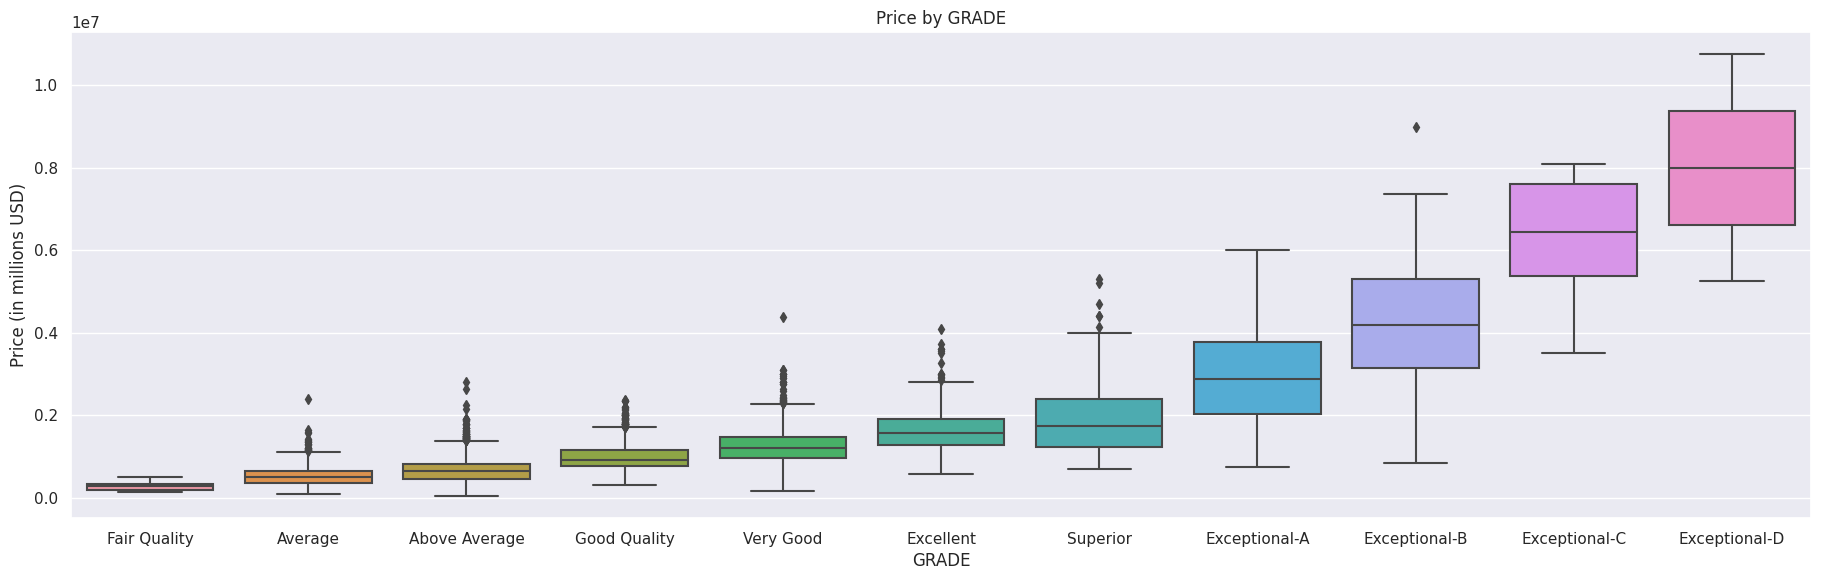

In [102]:
plt.figure(figsize=(20,6))
df_no_na = df8[['GRADE','PRICE']].copy().dropna()
table = df_no_na.groupby(['GRADE'],as_index=False)['PRICE'].median().sort_values(by='PRICE',ascending=True)
sns.boxplot(x='GRADE',y='PRICE',data=df_no_na,order=table['GRADE'].to_list())
plt.ylabel('Price (in millions USD)')
plt.title('Price by GRADE')
plt.show()

In [103]:
df_no_na['GRADE'].value_counts()

Average          3086
Above Average    2688
Good Quality     1814
Very Good         769
Excellent         303
Superior          286
Exceptional-A      80
Exceptional-B      24
Fair Quality        9
Exceptional-C       6
Exceptional-D       2
Name: GRADE, dtype: int64

In [104]:
df8.groupby('GRADE')['PRICE'].median().sort_values() #check price gradient of GRADE 

GRADE
Fair Quality      283000.0
Average           493250.0
Above Average     650000.0
Good Quality      928000.0
Very Good        1220000.0
Excellent        1573225.0
Superior         1750000.0
Exceptional-A    2880000.0
Exceptional-B    4201250.0
Exceptional-C    6450000.0
Exceptional-D    8000000.0
Name: PRICE, dtype: float64

In [105]:
df8['GRADE'].value_counts() #check number of records for each GRADE category

Average          3086
Above Average    2688
Good Quality     1814
Very Good         769
Excellent         303
Superior          286
Exceptional-A      80
Exceptional-B      24
Fair Quality        9
Exceptional-C       6
Exceptional-D       2
Name: GRADE, dtype: int64

Based on the price gradient for each GRADE, we can consider the exceptional **grade** as luxurious property. Since the price gap are quite high and the records are rare, we decide to limit our prediction model by excluding those in **exceptional** grade and fair quality.

In [106]:
#drop unusual values
def drop_unusual(df):
  df['AC'] = np.where(df['AC']=='Y',1,0) #convert to 1 0 
  df = df[df['HEAT']!='No Data'] #delete no data
  df = df[df['ROOMS']!=0] #exclude property with 0 rooms
  df = df[df['AYB']<= df['SALEYEAR']] #exclude values where AYB > SALEYEAR
  df = df[df['AYB']<= df['EYB']] #exclude values where AYB > EYB
  df = df[~df['GRADE'].isin(['Exceptional-D','Exceptional-C','Exceptional-B',
                             'Exceptional-A', 'Fair Quality'])] #exclude exceptional GRADE
  df = df[(df['PRICE'] < 1200000) & (df['PRICE'] > 250000)] # 10% quantile and 90% quantile

  return df

In [107]:
df9 = drop_unusual(df8)
     

df9.shape

(7231, 35)

##6. SIMILAR VALUES

**STORIES** has similar values with **STYLE**. We keep **STYLE** since **STORIES** has many outliers due to mistyping.

In [108]:


df9[['STORIES','STYLE']].value_counts()

STORIES  STYLE          
2.00     2 Story            5875
3.00     3 Story             397
2.50     2.5 Story Fin       243
1.00     1 Story             214
1.50     1.5 Story Fin       111
1.75     2 Story              61
2.25     2.5 Story Fin        60
         2 Story              49
4.00     4 Story              31
3.00     2 Story              28
2.50     2.5 Story Unfin      17
2.25     2.5 Story Unfin      17
2.50     2 Story              16
1.25     1.5 Story Fin        12
1.00     Split Foyer           9
1.25     1 Story               8
1.00     2 Story               7
2.00     3 Story               7
         Split Level           6
1.75     1.5 Story Fin         6
2.00     1 Story               5
1.50     1.5 Story Unfin       4
2.75     3 Story               4
1.00     Split Level           4
2.00     2.5 Story Fin         3
1.25     1.5 Story Unfin       3
2.00     2.5 Story Unfin       3
         1.5 Story Fin         3
1.50     2 Story               2
2.00     1.5 Story

In [109]:
def drop_similar_features(df):
    df = df.drop(['STORIES'], axis=1)
    
    return df

In [110]:
df10 = drop_similar_features(df9)

In [111]:
df10.shape

(7231, 34)

##7. CORRELATION

In [112]:
from itertools import combinations
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

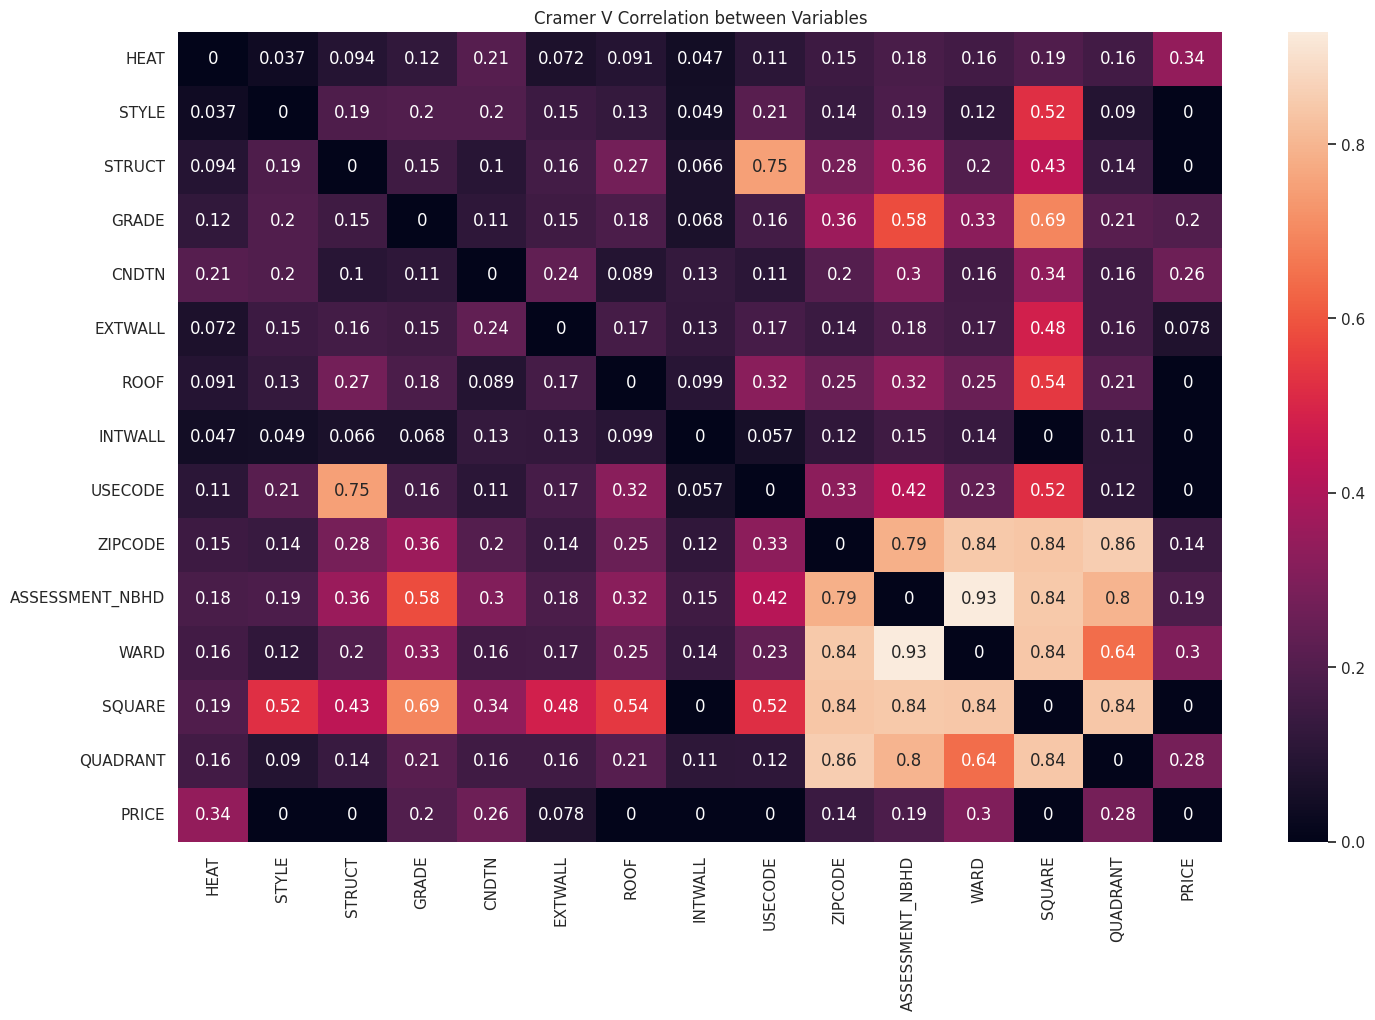

In [113]:

cols = ['HEAT','STYLE','STRUCT', 'GRADE', 'CNDTN', 'EXTWALL','ROOF', 'INTWALL','USECODE','ZIPCODE','ASSESSMENT_NBHD','WARD','SQUARE','QUADRANT','PRICE']
# fitur kategorikal yang diambil yang sekiranya dapat di korelasikan dengan 'Price', kategori geographical yang diambil hanya yang mempunyai distinct data yg kecil
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df10[col1], df10[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

The location features seems to have interaction with each other. Based on multiple trial on the model, we decide to take only **WARD**, since it is one of the top feature importance according to our model.

We also want to drop **LONGLAT** since it is already represented by the **WARD**.

In [114]:
df10.columns

Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'EYB', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE',
       'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'WARD', 'SQUARE', 'QUADRANT', 'SALEYEAR', 'RMDL'],
      dtype='object')

In [115]:
def drop_location_features(df):
    df = df.drop(['ZIPCODE','ASSESSMENT_NBHD','SQUARE','QUADRANT',
                  'LATITUDE','LONGITUDE'], axis=1)
    
    return df
    

In [116]:
df11 = drop_location_features(df10)

In [117]:
df11.shape

(7231, 28)

##NUMERICAL

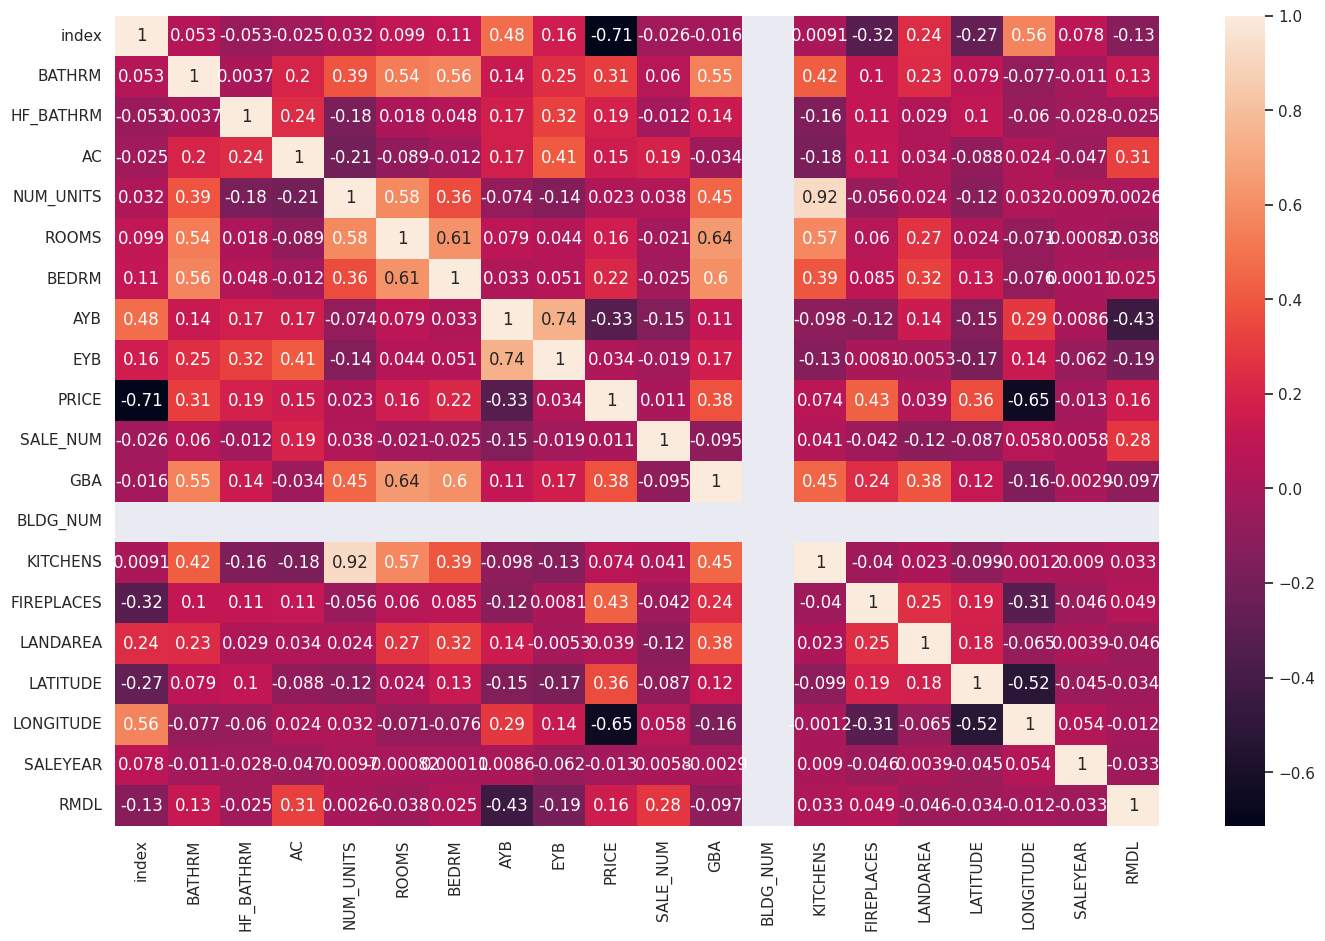

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(df10.corr(), annot=True)
plt.show()

Some multicollinearity occurs between :

*  **NUM_UNITS vs KITCHENS**


Weak correlation :

* **BLDG_NUM**

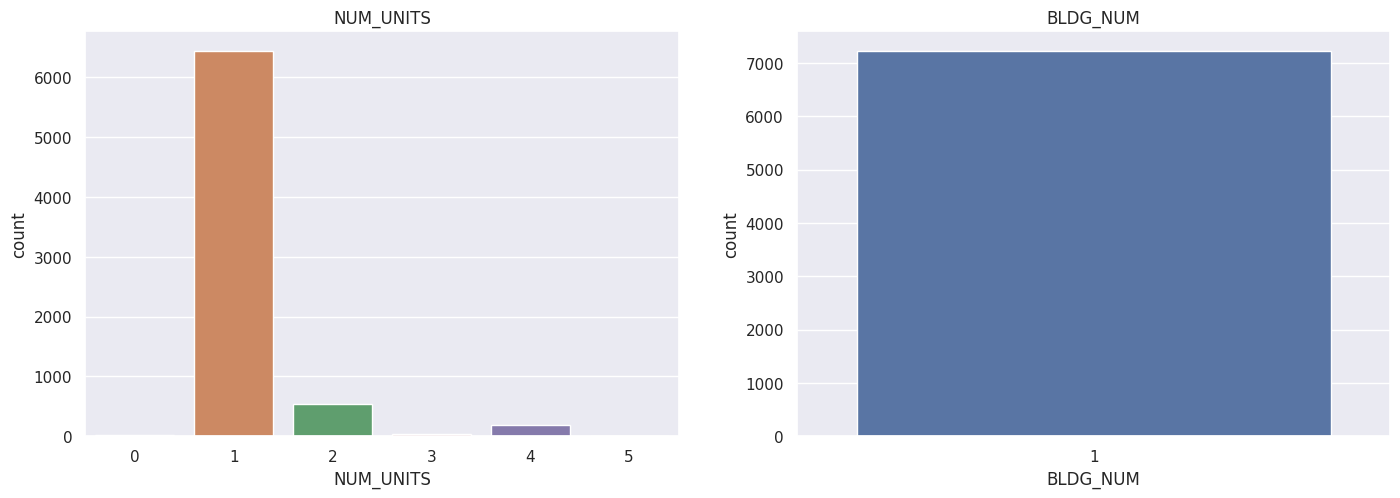

In [119]:

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df11['NUM_UNITS'],data=df11, ax=ax[0]).set_title('NUM_UNITS')
sns.countplot(x=df11['BLDG_NUM'], data=df11,ax=ax[1]).set_title('BLDG_NUM')
plt.show()

Since both of the feature has imbalanced values and is not considered important based on our model trial, we decide to drop both features

In [120]:

def drop_correlation(df):
    df = df.drop(['NUM_UNITS','BLDG_NUM'], axis=1)
    
    return df

In [121]:
df12 = drop_correlation(df11)

In [122]:
df12.columns

Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'AYB',
       'EYB', 'PRICE', 'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'WARD', 'SALEYEAR', 'RMDL'],
      dtype='object')

In [123]:
df12.shape

(7231, 26)

##8. FEATURE ENGINEERING

In [124]:
def feature_eng(df):
    df['AYB_SALEYEAR_DIFF'] = df['SALEYEAR']-df['AYB']
    # print(df['AYB_SALEYEAR_DIFF'])
    # print("Phase 2")
    df['AYB_SALEYEAR_DIFF'] = df['AYB_SALEYEAR_DIFF'].astype(pd.Int64Dtype())
    # print(df['AYB_SALEYEAR_DIFF'])
    # print("Phase 3")
    
    df['EYB_SALEYEAR_DIFF'] = df['SALEYEAR']
    # print(df['AYB_SALEYEAR_DIFF'])
    return df  


In [125]:

#AYB, EYB change to age, SQFT_ROOMS
df13 = feature_eng(df12)
df13.head()

index  BATHRM  HF_BATHRM       HEAT  AC  ROOMS  BEDRM   AYB   EYB  \
21    149       2          0  Warm Cool   1      6      3  1939  1967   
24    160       2          0  Warm Cool   1      6      3  1900  1969   
39    225       2          1  Warm Cool   1      6      3  1885  1969   
41    236       1          1  Warm Cool   1      6      2  1876  1964   
45    268       2          0  Warm Cool   1      6      2  1900  1969   

        PRICE  ...   INTWALL  KITCHENS FIREPLACES USECODE LANDAREA    WARD  \
21   950000.0  ...  Hardwood         1          1      11    652.0  Ward 2   
24   830000.0  ...  Hardwood         1          0      11    560.0  Ward 1   
39  1120000.0  ...  Hardwood         2          1      24   1015.0  Ward 2   
41   915000.0  ...  Hardwood         1          1      11    900.0  Ward 2   
45  1080000.0  ...  Hardwood         1          1      11    609.0  Ward 2   

   SALEYEAR RMDL AYB_SALEYEAR_DIFF  EYB_SALEYEAR_DIFF  
21     2017    1                78               2017  
24     2016    1               116               2016  
39     2017    1               132               2017  
41     2017    1               141               2017  
45     2018    1               118               2018  

[5 rows x 28 columns]

In [126]:
print(df12)

        index  BATHRM  HF_BATHRM        HEAT  AC  ROOMS  BEDRM   AYB   EYB  \
21        149       2          0   Warm Cool   1      6      3  1939  1967   
24        160       2          0   Warm Cool   1      6      3  1900  1969   
39        225       2          1   Warm Cool   1      6      3  1885  1969   
41        236       1          1   Warm Cool   1      6      2  1876  1964   
45        268       2          0   Warm Cool   1      6      2  1900  1969   
...       ...     ...        ...         ...  ..    ...    ...   ...   ...   
15568  106531       3          1  Forced Air   1      8      3  2017  2017   
15575  106575       2          1  Forced Air   1      8      3  1941  1964   
15578  106599       1          0   Warm Cool   1      4      2  1950  1969   
15581  106628       2          1  Forced Air   1      6      3  1941  1964   
15582  106650       2          0  Forced Air   1      7      5  1939  1964   

           PRICE  ...        INTWALL  KITCHENS FIREPLACES USECO

##9. MODEL EVALUATION

Based on our model evaluation, we drop several features that is insignificant to our model

In [127]:
df.columns

Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT',
       'SALEYEAR'],
      dtype='object')

In [129]:
def drop_model_evaluation(df):
    df = df.drop(['ROOMS','USECODE'],axis=1)
    return df
     

In [130]:
#drop ROOMS, USECODE
df14 = drop_model_evaluation(df13)

In [131]:

df14.shape

(7231, 26)

##10. ENCODING

In [132]:

%%capture
!pip install category_encoders

In [133]:
import category_encoders as ce

In [134]:

#encoding
def encoding_categorical(df):
  ordinal_mapping = [{'col':'CNDTN','mapping':{'Poor':1,'Fair':2,'Average':3,'Good':4,'Very Good':5,'Excellent':6}}]
  ordinal_encoder = ce.OrdinalEncoder(cols ='CNDTN',mapping = ordinal_mapping) 
  df = ordinal_encoder.fit_transform(df)

  ordinal_mapping = [{'col':'GRADE','mapping':{'Average':1,'Above Average':2,'Good Quality':3,'Very Good':4,'Excellent':5,'Superior':6}}]
  ordinal_encoder = ce.OrdinalEncoder(cols ='GRADE',mapping = ordinal_mapping) 
  df = ordinal_encoder.fit_transform(df)                                                   
  return df

In [135]:
df15 = encoding_categorical(df14)                                             
     

df15

index  BATHRM  HF_BATHRM        HEAT  AC  BEDRM   AYB   EYB  \
21        149       2          0   Warm Cool   1      3  1939  1967   
24        160       2          0   Warm Cool   1      3  1900  1969   
39        225       2          1   Warm Cool   1      3  1885  1969   
41        236       1          1   Warm Cool   1      2  1876  1964   
45        268       2          0   Warm Cool   1      2  1900  1969   
...       ...     ...        ...         ...  ..    ...   ...   ...   
15568  106531       3          1  Forced Air   1      3  2017  2017   
15575  106575       2          1  Forced Air   1      3  1941  1964   
15578  106599       1          0   Warm Cool   1      2  1950  1969   
15581  106628       2          1  Forced Air   1      3  1941  1964   
15582  106650       2          0  Forced Air   1      5  1939  1964   

           PRICE  SALE_NUM  ...          ROOF        INTWALL KITCHENS  \
21      950000.0         4  ...         Slate       Hardwood        1   
24      830000.0         4  ...      Built Up       Hardwood        1   
39     1120000.0         3  ...      Built Up       Hardwood        2   
41      915000.0         5  ...    Metal- Sms       Hardwood        1   
45     1080000.0         3  ...  Comp Shingle       Hardwood        1   
...          ...       ...  ...           ...            ...      ...   
15568   438000.0         2  ...  Comp Shingle  Hardwood/Carp        1   
15575   355000.0         2  ...      Built Up       Hardwood        2   
15578   300000.0         7  ...  Comp Shingle       Hardwood        1   
15581   350000.0         3  ...      Built Up       Hardwood        1   
15582   336000.0         4  ...  Comp Shingle       Hardwood        1   

       FIREPLACES  LANDAREA    WARD SALEYEAR RMDL  AYB_SALEYEAR_DIFF  \
21              1     652.0  Ward 2     2017    1                 78   
24              0     560.0  Ward 1     2016    1                116   
39              1    1015.0  Ward 2     2017    1                132   
41              1     900.0  Ward 2     2017    1                141   
45              1     609.0  Ward 2     2018    1                118   
...           ...       ...     ...      ...  ...                ...   
15568           0    4491.0  Ward 8     2017    0                  0   
15575           1    2110.0  Ward 8     2018    1                 77   
15578           0    1528.0  Ward 8     2017    1                 67   
15581           0    1834.0  Ward 8     2017    1                 76   
15582           2    4480.0  Ward 8     2016    1                 77   

       EYB_SALEYEAR_DIFF  
21                  2017  
24                  2016  
39                  2017  
41                  2017  
45                  2018  
...                  ...  
15568               2017  
15575               2018  
15578               2017  
15581               2017  
15582               2016  

[7231 rows x 26 columns]

##SUMMARY PREPROCESSING

In [136]:
#DEV SET
df1 = casting(df)
df2 = saleyear(df1)
df3 = drop_qualified(df2)
df4 = residential(df3)
df5 = drop_unused_features(df4)
df6 = yr_rmdl(df5)
df7 = drop_all(df6)
df8 = drop_unrelated_features(df7)
df9 = drop_unusual(df8)
df10 = drop_similar_features(df9)
df11 = drop_location_features(df10)
df12 = drop_correlation(df11)
df13 = feature_eng(df12)
df14 = drop_model_evaluation(df13)
df15 = encoding_categorical(df14)

In [137]:

df15.shape

(7231, 26)

In [138]:

df15.columns

Index(['index', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'BEDRM', 'AYB', 'EYB',
       'PRICE', 'SALE_NUM', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'LANDAREA',
       'WARD', 'SALEYEAR', 'RMDL', 'AYB_SALEYEAR_DIFF', 'EYB_SALEYEAR_DIFF'],
      dtype='object')

In [139]:
from google.colab import files
df15.to_csv('dev_preprocessed.csv',index=False)
files.download('dev_preprocessed.csv')


##TEST SET

In [140]:

df_test = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_data.csv') #using test set
     

df_test

index  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0          8       3          1      Warm Cool  Y        2.0      7      3   
1        121       5          1  Hot Water Rad  Y        2.0     13      7   
2        131       3          1  Hot Water Rad  Y        1.0      6      3   
3        177       2          0  Hot Water Rad  N        2.0      8      4   
4        247       3          0      Warm Cool  Y        2.0      9      4   
...      ...     ...        ...            ... ..        ...    ...    ...   
2948  158824       2          1        Ht Pump  Y        NaN      4      2   
2949  158836       1          0      Warm Cool  Y        NaN      4      2   
2950  158839       1          0      Warm Cool  Y        NaN      4      2   
2951  158855       1          0      Warm Cool  Y        NaN      3      1   
2952  158902       2          0     Forced Air  Y        NaN      5      2   

         AYB  YR_RMDL  ...       ASSESSMENT_NBHD  ASSESSMENT_SUBNBHD  \
0     1908.0   2008.0  ...            Old City 2    040 D Old City 2   
1     1883.0   1980.0  ...            Old City 2    040 D Old City 2   
2     1908.0   2005.0  ...            Old City 2    040 D Old City 2   
3     1900.0      NaN  ...            Old City 2    040 E Old City 2   
4     1918.0   2009.0  ...            Old City 2    040 D Old City 2   
...      ...      ...  ...                   ...                 ...   
2948  2013.0      NaN  ...         Central-tri 3                 NaN   
2949  1967.0      NaN  ...  Southwest Waterfront                 NaN   
2950  1967.0      NaN  ...  Southwest Waterfront                 NaN   
2951  1967.0      NaN  ...  Southwest Waterfront                 NaN   
2952  2005.0   2005.0  ...            Old City 2    040 G Old City 2   

     CENSUS_TRACT  CENSUS_BLOCK    WARD  SQUARE          X          Y  \
0          4201.0   004201 2005  Ward 2     152 -77.040429  38.914881   
1          5500.0   005500 1005  Ward 2      93 -77.045889  38.912003   
2          4201.0   004201 2005  Ward 2     152 -77.040429  38.914881   
3          5201.0   005201 4002  Ward 2     208 -77.033366  38.911716   
4          5500.0   005500 1004  Ward 2      93 -77.045889  38.912003   
...           ...           ...     ...     ...        ...        ...   
2948       5800.0           NaN  Ward 2     374 -77.025376  38.900443   
2949      10200.0           NaN  Ward 6     468 -77.020324  38.880130   
2950      10200.0           NaN  Ward 6     468 -77.020324  38.880130   
2951      10200.0           NaN  Ward 6     468 -77.020324  38.880130   
2952       4801.0           NaN  Ward 6     475 -77.019277  38.914287   

     QUADRANT SALEYEAR  
0          NW   2018.0  
1          NW   2018.0  
2          NW   2018.0  
3          NW   2018.0  
4          NW   2018.0  
...       ...      ...  
2948       NW   2018.0  
2949       SW   2018.0  
2950       SW   2018.0  
2951       SW   2018.0  
2952       NW   2018.0  

[2953 rows x 50 columns]

In [141]:

#TEST SET
df1_test = casting(df_test)
df2_test = saleyear(df1_test)
df3_test = drop_qualified(df2_test)
df4_test = residential(df3_test)
df5_test = drop_unused_features(df4_test)
df6_test = yr_rmdl(df5_test)
df7_test = drop_all(df6_test)
df8_test = drop_unrelated_features(df7_test)
df9_test = drop_unusual(df8_test)
df10_test = drop_similar_features(df9_test)
df11_test = drop_location_features(df10_test)
df12_test = drop_correlation(df11_test)
df13_test = feature_eng(df12_test)
df14_test = drop_model_evaluation(df13_test)
df15_test = encoding_categorical(df14_test)

In [142]:
df15_test.shape

(1015, 26)

In [143]:

from google.colab import files
df15_test.to_csv('test_preprocessed.csv',index=False)
files.download('test_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Deployment End to End

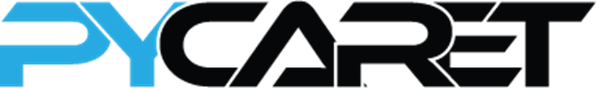

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

In [144]:
!pip install pycaret[full]
!pip install interpret-community


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached interpret_core-0.4.1-py3-none-any.whl (11.6 MB)
  Attempting uninstall: interpret-core
    Found existing installation: interpret-core 0.3.2
    Uninstalling interpret-core-0.3.2:
      Successfully uninstalled interpret-core-0.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
interpret-community 0.29.0 requires interpret-core[required]<=0.3.2,>=0.1.20, but you have interpret-core 0.4.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached interpret_core-0.3.2-py3-none-any.whl (9.1 MB)
  Attempting uninstall: interpret-core
    Found existing installation: interpret-core 0.4.1
    Uninstalling interpret-core-0.4.1:
      Successfully uninstalled interpret-core-0.4.1

##Getting the Data

In [145]:
import pandas as pd
import numpy as np
from numpy import sum as arraysum

In [146]:

dataset = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/dev_preprocessed.csv')
dataset.drop(['index'], axis=1, inplace=True)
dataset.head()

BATHRM  HF_BATHRM       HEAT  AC  BEDRM      PRICE  SALE_NUM     GBA  \
0       2          0  Warm Cool   1      3   950000.0         4   918.0   
1       2          0  Warm Cool   1      3   830000.0         4  1335.0   
2       2          1  Warm Cool   1      3  1120000.0         3  1464.0   
3       1          1  Warm Cool   1      2   915000.0         5  1152.0   
4       2          0  Warm Cool   1      2  1080000.0         3  1494.0   

     STYLE      STRUCT  ...   INTWALL  KITCHENS FIREPLACES LANDAREA    WARD  \
0  2 Story  Row Inside  ...  Hardwood         1          1    652.0  Ward 2   
1  3 Story  Row Inside  ...  Hardwood         1          0    560.0  Ward 1   
2  2 Story  Row Inside  ...  Hardwood         2          1   1015.0  Ward 2   
3  2 Story  Row Inside  ...  Hardwood         1          1    900.0  Ward 2   
4  3 Story     Row End  ...  Hardwood         1          1    609.0  Ward 2   

   SALEYEAR  RMDL  AYB_SALEYEAR_DIFF EYB_SALEYEAR_DIFF  SQFT_ROOMS  
0      2017     1                 78                50       153.0  
1      2016     1                116                47       222.5  
2      2017     1                132                48       244.0  
3      2017     1                141                53       192.0  
4      2018     1                118                49       249.0  

[5 rows x 24 columns]

In [147]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231 entries, 0 to 7230
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             7231 non-null   int64  
 1   HF_BATHRM          7231 non-null   int64  
 2   HEAT               7231 non-null   object 
 3   AC                 7231 non-null   int64  
 4   BEDRM              7231 non-null   int64  
 5   PRICE              7231 non-null   float64
 6   SALE_NUM           7231 non-null   int64  
 7   GBA                7231 non-null   float64
 8   STYLE              7231 non-null   object 
 9   STRUCT             7231 non-null   object 
 10  GRADE              7231 non-null   int64  
 11  CNDTN              7231 non-null   int64  
 12  EXTWALL            7231 non-null   object 
 13  ROOF               7231 non-null   object 
 14  INTWALL            7231 non-null   object 
 15  KITCHENS           7231 non-null   int64  
 16  FIREPLACES         7231 

In [150]:
dataset.describe()

BATHRM    HF_BATHRM           AC        BEDRM         PRICE  \
count  7231.000000  7231.000000  7231.000000  7231.000000  7.231000e+03   
mean      2.181856     0.649288     0.797815     3.311990  6.580532e+05   
std       0.867729     0.565318     0.401657     0.942331  2.369446e+05   
min       1.000000     0.000000     0.000000     0.000000  2.510000e+05   
25%       2.000000     0.000000     1.000000     3.000000  4.500000e+05   
50%       2.000000     1.000000     1.000000     3.000000  6.500000e+05   
75%       3.000000     1.000000     1.000000     4.000000  8.355580e+05   
max       7.000000     7.000000     1.000000    13.000000  1.199000e+06   

          SALE_NUM          GBA        GRADE        CNDTN     KITCHENS  \
count  7231.000000  7231.000000  7231.000000  7231.000000  7231.000000   
mean      3.728945  1507.406859     1.958512     3.962799     1.203706   
std       1.450365   499.325707     0.997060     0.755157     0.577702   
min       2.000000   407.000000     1.000000     1.000000     0.000000   
25%       3.000000  1180.000000     1.000000     3.000000     1.000000   
50%       3.000000  1404.000000     2.000000     4.000000     1.000000   
75%       4.000000  1706.000000     3.000000     4.000000     1.000000   
max      15.000000  5142.000000     6.000000     6.000000     5.000000   

        FIREPLACES      LANDAREA     SALEYEAR         RMDL  AYB_SALEYEAR_DIFF  \
count  7231.000000   7231.000000  7231.000000  7231.000000        7231.000000   
mean      0.445996   2669.437837  2016.733370     0.648458          79.577375   
std       0.671970   1954.302020     0.682516     0.477485          32.008130   
min       0.000000    327.000000  2016.000000     0.000000           0.000000   
25%       0.000000   1419.000000  2016.000000     0.000000          69.000000   
50%       0.000000   1992.000000  2017.000000     1.000000          87.000000   
75%       1.000000   3365.000000  2017.000000     1.000000         100.000000   
max       6.000000  34491.000000  2018.000000     1.000000         251.000000   

       EYB_SALEYEAR_DIFF   SQFT_ROOMS  
count        7231.000000  7231.000000  
mean           45.053520   214.216388  
std            17.413157    55.783594  
min             0.000000    69.333333  
25%            42.000000   175.500000  
50%            49.000000   206.000000  
75%            53.000000   243.200000  
max            75.000000   668.666667

In order to evaluate the predictions on completely unseen data, a sample of 1015 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1015 records were not available at the time when the machine learning experiment was performed.



In [151]:

data_unseen = pd.read_csv('https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/test_preprocessed.csv')
data_unseen.drop(['index'], axis=1, inplace=True)
data_unseen.head()
     

BATHRM  HF_BATHRM           HEAT  AC  BEDRM      PRICE  SALE_NUM     GBA  \
0       2          0  Hot Water Rad   0      4   990000.0         2  1707.0   
1       1          1      Warm Cool   1      3   899000.0         4   900.0   
2       1          0     Forced Air   0      3   928000.0         2  1322.0   
3       1          0  Hot Water Rad   0      3   700000.0         3  1322.0   
4       2          0     Forced Air   1      3  1050000.0         4  1128.0   

     STYLE         STRUCT  ...        INTWALL  KITCHENS FIREPLACES LANDAREA  \
0  3 Story  Semi-Detached  ...       Hardwood         2          0    517.0   
1  3 Story     Row Inside  ...       Hardwood         1          1    827.0   
2  2 Story     Row Inside  ...       Hardwood         1          0   1125.0   
3  2 Story     Row Inside  ...         Carpet         1          0   1125.0   
4  2 Story        Row End  ...  Hardwood/Carp         2          0    640.0   

     WARD  SALEYEAR  RMDL  AYB_SALEYEAR_DIFF EYB_SALEYEAR_DIFF  SQFT_ROOMS  
0  Ward 2      2018     0                118                55  213.375000  
1  Ward 1      2018     0                138                57  150.000000  
2  Ward 1      2018     0                128                61  264.400000  
3  Ward 1      2018     1                128                61  220.333333  
4  Ward 1      2018     1                118                58  188.000000  

[5 rows x 24 columns]

In [152]:
data_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BATHRM             1015 non-null   int64  
 1   HF_BATHRM          1015 non-null   int64  
 2   HEAT               1015 non-null   object 
 3   AC                 1015 non-null   int64  
 4   BEDRM              1015 non-null   int64  
 5   PRICE              1015 non-null   float64
 6   SALE_NUM           1015 non-null   int64  
 7   GBA                1015 non-null   float64
 8   STYLE              1015 non-null   object 
 9   STRUCT             1015 non-null   object 
 10  GRADE              1015 non-null   int64  
 11  CNDTN              1015 non-null   int64  
 12  EXTWALL            1015 non-null   object 
 13  ROOF               1015 non-null   object 
 14  INTWALL            1015 non-null   object 
 15  KITCHENS           1015 non-null   int64  
 16  FIREPLACES         1015 

In [153]:

data_unseen.describe()

BATHRM    HF_BATHRM           AC        BEDRM         PRICE  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1.015000e+03   
mean      2.023645     0.594089     0.668966     3.214778  6.639036e+05   
std       0.923842     0.599774     0.470817     0.944818  2.443871e+05   
min       0.000000     0.000000     0.000000     1.000000  2.510000e+05   
25%       1.000000     0.000000     0.000000     3.000000  4.500000e+05   
50%       2.000000     1.000000     1.000000     3.000000  6.500000e+05   
75%       3.000000     1.000000     1.000000     4.000000  8.600000e+05   
max       6.000000     4.000000     1.000000     8.000000  1.199000e+06   

          SALE_NUM          GBA        GRADE        CNDTN     KITCHENS  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean      3.673892  1498.258128     1.892611     3.698522     1.207882   
std       1.483326   535.384993     0.954226     0.785562     0.624245   
min       2.000000   576.000000     1.000000     2.000000     0.000000   
25%       3.000000  1152.000000     1.000000     3.000000     1.000000   
50%       3.000000  1376.000000     2.000000     4.000000     1.000000   
75%       4.000000  1694.000000     2.000000     4.000000     1.000000   
max      13.000000  4142.000000     6.000000     6.000000     4.000000   

        FIREPLACES      LANDAREA  SALEYEAR         RMDL  AYB_SALEYEAR_DIFF  \
count  1015.000000   1015.000000    1015.0  1015.000000        1015.000000   
mean      0.423645   2712.242365    2018.0     0.529064          83.537931   
std       0.703494   1971.861227       0.0     0.499401          30.341389   
min       0.000000    453.000000    2018.0     0.000000           0.000000   
25%       0.000000   1464.000000    2018.0     0.000000          72.000000   
50%       0.000000   2055.000000    2018.0     1.000000          91.000000   
75%       1.000000   3324.500000    2018.0     1.000000         104.000000   
max       5.000000  18915.000000    2018.0     1.000000         216.000000   

       EYB_SALEYEAR_DIFF   SQFT_ROOMS  
count        1015.000000  1015.000000  
mean           50.648276   215.416368  
std            17.331933    55.442053  
min             0.000000    96.000000  
25%            49.000000   178.850000  
50%            54.000000   208.000000  
75%            61.000000   241.763889  
max            75.000000   690.333333

The training data are the transactions that happened from 2016 to 2018 which contains 7231 records and the testing data are from 2018 (after the latest transaction from training data) to 2018 which contains 2310 records. We split the testing data to the recent years to simulate real-world scenario.

In [155]:

print(f"Training Data: {dataset['SALEYEAR'].min()} to {dataset['SALEYEAR'].max()}")
print(f"Testing Data: {data_unseen['SALEYEAR'].min()} to {data_unseen['SALEYEAR'].max()}")

Training Data: 2016 to 2018
Testing Data: 2018 to 2018


##Setting up Environment in PyCaret

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution.

In [156]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [157]:
!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imgaug-0.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imgaug/*
Proceed (Y/n)? Y
  Successfully uninstalled imgaug-0.4.0
Found existing installation: albumentations 1.2.1
Uninstalling albumentations-1.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/albumentations-1.2.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/albumentations/*
Proceed (Y/n)? Y
  Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-ti2af4d4
  Running command git clone --filter=blob:none --quiet https://github.com/aleju/imgaug.git /tmp/pip-req-build-ti2af4d4
  Resolved https://github.com/aleju/imgaug.git to commit 0101108d4fed06bc5056c4a03e2bcb0216dac326
Y
  Preparing metadata (setup.py) ... d

In [158]:
!pip install setuptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1y


In [159]:
! pip install --upgrade packaging==21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
! pip install runway

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.5/779.5 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.2 MB/s eta 0:00:00
    

In [161]:
!pipenv install runway

Creating a virtualenv for this project...
Pipfile: /content/Pipfile
Using /usr/local/bin/python (3.10.11) to create virtualenv...
⠹ Creating virtual environment...created virtual environment CPython3.10.11.final.0-64 in 1356ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/content-cQIIIOO2, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.0.1, setuptools==67.4.0, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment! 
Virtualenv location: /root/.local/share/virtualenvs/content-cQIIIOO2
Creating a Pipfile for this project...
Installing runway...
Adding runway to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock not found, creating...
Locking [dev-packages] dependencies...
Locking [pac

In [162]:
!pip install --upgrade scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
!pipenv --python 3.10

Virtualenv already exists!
Removing existing virtualenv...
Creating a virtualenv for this project...
Pipfile: /content/Pipfile
Using /usr/local/bin/python (3.10.11) to create virtualenv...
⠼ Creating virtual environment...created virtual environment CPython3.10.11.final.0-64 in 205ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/content-cQIIIOO2, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.0.1, setuptools==67.4.0, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment! 
Virtualenv location: /root/.local/share/virtualenvs/content-cQIIIOO2


In [164]:
!pip install --upgrade packaging

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 1.30.1 requires packaging<22, but you have packaging 23.1 which is incompatible.


In [165]:
!pip show packaging

Name: packaging
Version: 23.1
Summary: Core utilities for Python packages
Home-page: 
Author: 
Author-email: Donald Stufft <donald@stufft.io>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: arviz, astropy, bokeh, build, dask, db-dtypes, deprecation, distributed, docker, fastai, fastcore, google-cloud-bigquery, gradio_client, h5netcdf, holoviews, huggingface-hub, hvplot, interpret-community, jupyter-server, matplotlib, mlflow, nbconvert, optuna, pooch, pytest, qtconsole, QtPy, ray, runway, scikit-image, shap, spacy, Sphinx, statsmodels, tables, tensorboardX, tensorflow, thinc, xarray


In [166]:
import pycaret.regression as reg


In [ ]:
regression_setup = reg.setup(data=dataset, target='PRICE', session_id=42, use_gpu=True, train_size=0.8, normalize=True, transformation=True,
                         categorical_features=['GRADE', 'HEAT', 'STYLE', 'AC', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL', 'WARD', 'RMDL', 'CNDTN'],
                         numeric_features=['BATHRM', 'HF_BATHRM', 'BEDRM', 'SALE_NUM', 'SQFT_ROOMS', 'AYB_SALEYEAR_DIFF', 'EYB_SALEYEAR_DIFF', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SALEYEAR'])
     

##Baseline Model

When we evaluate a model's performance, it is important to create a baseline model so we can see whether our model improved from the baseline and how much did it improve. Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages.

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = dataset.drop('PRICE', axis=1)
y = dataset['PRICE']

def evaluate_baseline(model):
     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
     scores = -scores.mean()
     return scores

dummy_reg_mean = DummyRegressor(strategy="mean")
dummy_reg_median = DummyRegressor(strategy='median')
dummy_reg_quantile = DummyRegressor(strategy='quantile', quantile=0.44)
dummy_reg_constant = DummyRegressor(strategy='constant', constant=450000)

print('Dummy Regressor (mean):', evaluate_baseline(dummy_reg_mean))
print('Dummy Regressor (median): ', evaluate_baseline(dummy_reg_median))
print('Dummy Regressor (quantile):', evaluate_baseline(dummy_reg_quantile))
print('Dummy Regressor (constant):', evaluate_baseline(dummy_reg_constant))

##Comparing All Models

When comparing models, we will create all models using 5 fold cross validation. We will focus on the Mean Absolute Error (MAE) because it is robuts to outliers which exist in our dataset.



In [169]:
models = reg.compare_models(fold=5, sort='MAE')

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In order to meet the business requirements, we used a different variety of regression models for housing price prediction. We tested 20 models including several gradient boosting models such as LightGBM, XGBoost, and CatBoost. From the results, we conclude that CatBoost performed the best during the 10 fold cross-validation with an average of 70669.4131 for Mean Absolute Error (MAE), 122664.1670 for Root Mean Squared Error (RMSE), and 0.9127 for the R2 Score. We also tested the model using a holdout set and it got 106348.97 for the Mean Absolute Error which means the model is stable and performed really well.

Since the model has the desired result, we deployed the model on Heroku and we tested the model with unseen data that are not in the original dataset. By using this deployed model, buyers or sellers can easily fill in the house's information and they will receive the predicted price by the model in less than 2 seconds. This will help both the buyers and sellers in making informed decisions to avoid underpricing or overpricing. Policymakers can also analyze the data to observe the condition of housing prices in Washington D.C.

* Despite having produced a working application that met our initial requirements, there are various improvements that can be made in the future. These include improvements we did not make due to limited time on the project and suggestions provided by users after using our web application.

* Consider more factors affecting housing prices by analyzing more than one dataset.
Add more functionalities into the application to increase the user experience.